# Splitting Data

In [1]:
import pandas as pd
import math as ma
import datetime
from pathlib import Path

In [2]:
path_1 = Path(r'C:\Users\Desktop\money\coding\2. Crypto\Backtesting\Remaking Data')
df = pd.read_csv(path_1.joinpath("BTC_12H_OHLC_UTC.csv"))
df

,Timestamp,Open,High,Low,Close,Volume
0,2015-01-01 00:00:00,321.00,321.00,312.60,315.57,2538.010035
1,2015-01-01 12:00:00,315.57,317.37,313.24,313.81,2516.000581
2,2015-01-02 00:00:00,313.81,315.99,311.96,314.30,1892.409396
3,2015-01-02 12:00:00,314.93,317.01,313.45,315.42,2880.737510
4,2015-01-03 00:00:00,315.42,316.58,303.46,304.90,7332.946209
...,...,...,...,...,...,...
5798,2022-12-14 00:00:00,17775.82,17878.50,17734.19,17824.93,77465.140230
5799,2022-12-14 12:00:00,17824.93,18387.95,17660.94,17803.15,189216.081860
5800,2022-12-15 00:00:00,17804.01,17854.82,17561.00,17720.33,78631.824040
5801,2022-12-15 12:00:00,17720.33,17725.93,17275.51,17356.34,145070.144780


In [3]:
data_start = df.Timestamp.iloc[0]
data_start

'2015-01-01 00:00:00'

In [4]:
data_end = df.Timestamp.iloc[-1]
data_end

'2022-12-16 00:00:00'

# Optimizing

In [5]:
#Make the SMA just trade long signals, so no shorting
from IterativeOPT_MASR_V1 import *

In [6]:
## Here I am defining the parameters that I need to pass when I call the function
symbol = "Close"
SMA = 10
EMA = 200
PCT_BUY = 0.06
PCT_SELL = 0.17
Keep_Signal_1 = 1
Keep_Signal_2 = 1
Keep_Signal_3 = 1
Keep_Signal_4 = 1
stop_loss = 0.20
start = data_start
end = data_end
amount = 3000
leverage = 1
fee = 0.001

In [7]:
optimizer = IterativeBacktest(symbol, start, end, amount, SMA, EMA, PCT_BUY, PCT_SELL, stop_loss, Keep_Signal_1, Keep_Signal_2, Keep_Signal_3, Keep_Signal_4, leverage, fee)

In [8]:
optimizer.data

,Open,High,Low,Close,Volume,returns,SMA_Trend,EMA_Trend
Timestamp,,,,,,,,
2015-01-01 00:00:00,321.00,321.00,312.60,315.57,2538.010035,NaN,NaN,NaN
2015-01-01 12:00:00,315.57,317.37,313.24,313.81,2516.000581,-0.005593,NaN,NaN
2015-01-02 00:00:00,313.81,315.99,311.96,314.30,1892.409396,0.001560,NaN,NaN
2015-01-02 12:00:00,314.93,317.01,313.45,315.42,2880.737510,0.003557,NaN,NaN
2015-01-03 00:00:00,315.42,316.58,303.46,304.90,7332.946209,-0.033921,NaN,NaN
...,...,...,...,...,...,...,...,...
2022-12-14 00:00:00,17775.82,17878.50,17734.19,17824.93,77465.140230,0.002822,17291.985,18927.022138
2022-12-14 12:00:00,17824.93,18387.95,17660.94,17803.15,189216.081860,-0.001223,17359.444,18915.839331
2022-12-15 00:00:00,17804.01,17854.82,17561.00,17720.33,78631.824040,-0.004663,17414.616,18903.943716


In [9]:
SMA_Trend_Range = (5, 301, 5)
EMA_Trend_Range = (5, 301, 5)

In [10]:
optimizer.optimize_parameters(SMA_Trend_Range, EMA_Trend_Range)

---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 5 EMA_Trend = 5 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 193768.88
2022-12-16 00:00:00 | net performance (%) = 6358.96
2022-12-16 00:00:00 | number of trades executed = 1341
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 5 EMA_Trend = 10 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 208278.66
2022-12-16 00:00:00 | net performance (%) = 6842.62
2022-12-16 00:00:00 | number of tr

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 170741.58
2022-12-16 00:00:00 | net performance (%) = 5591.39
2022-12-16 00:00:00 | number of trades executed = 899
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 5 EMA_Trend = 90 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 136526.83
2022-12-16 00:00:00 | net performance (%) = 4450.89
2022-12-16 00:00:00 | number of trades executed = 905
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 5 EMA_Trend = 95 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
--------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 115906.36
2022-12-16 00:00:00 | net performance (%) = 3763.55
2022-12-16 00:00:00 | number of trades executed = 879
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 5 EMA_Trend = 175 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 119705.39
2022-12-16 00:00:00 | net performance (%) = 3890.18
2022-12-16 00:00:00 | number of trades executed = 875
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 5 EMA_Trend = 180 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 167225.69
2022-12-16 00:00:00 | net performance (%) = 5474.19
2022-12-16 00:00:00 | number of trades executed = 887
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 5 EMA_Trend = 260 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 166620.87
2022-12-16 00:00:00 | net performance (%) = 5454.03
2022-12-16 00:00:00 | number of trades executed = 887
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 5 EMA_Trend = 265 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 2154295.37
2022-12-16 00:00:00 | net performance (%) = 71709.85
2022-12-16 00:00:00 | number of trades executed = 635
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 10 EMA_Trend = 45 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 2036320.04
2022-12-16 00:00:00 | net performance (%) = 67777.33
2022-12-16 00:00:00 | number of trades executed = 621
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 10 EMA_Trend = 50 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
--------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 1315255.86
2022-12-16 00:00:00 | net performance (%) = 43741.86
2022-12-16 00:00:00 | number of trades executed = 561
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 10 EMA_Trend = 125 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 1347301.96
2022-12-16 00:00:00 | net performance (%) = 44810.07
2022-12-16 00:00:00 | number of trades executed = 561
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 10 EMA_Trend = 130 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 1964569.44
2022-12-16 00:00:00 | net performance (%) = 65385.65
2022-12-16 00:00:00 | number of trades executed = 533
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 10 EMA_Trend = 205 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 1812165.33
2022-12-16 00:00:00 | net performance (%) = 60305.51
2022-12-16 00:00:00 | number of trades executed = 537
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 10 EMA_Trend = 210 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 2302763.16
2022-12-16 00:00:00 | net performance (%) = 76658.77
2022-12-16 00:00:00 | number of trades executed = 531
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 10 EMA_Trend = 285 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 2142688.99
2022-12-16 00:00:00 | net performance (%) = 71322.97
2022-12-16 00:00:00 | number of trades executed = 531
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 10 EMA_Trend = 290 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
------------------------------------------------

---------------------------------------------------------------------------
2022-12-16 00:00:00 | +++ CLOSING FINAL POSITION +++
2022-12-16 00:00:00 | closing position of 34.173543958295944 for 17462.41
2022-12-16 00:00:00 | Current Balance: 596752.4
2022-12-16 00:00:00 | net performance (%) = 19791.75
2022-12-16 00:00:00 | number of trades executed = 536
---------------------------------------------------------------------------
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 15 EMA_Trend = 55 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
2022-12-16 00:00:00 | +++ CLOSING FINAL POSITION +++
2022-12-16 00:00:00 | closing position of 34.90673836020239 for 17462.41
2022-12-16 00:00:00 | Current Balance: 609555.74
2022-12-16 00:00:00 | net performance (%) = 20218.52
2022-12-16 

---------------------------------------------------------------------------
2022-12-16 00:00:00 | +++ CLOSING FINAL POSITION +++
2022-12-16 00:00:00 | closing position of 24.599065147726236 for 17462.41
2022-12-16 00:00:00 | Current Balance: 429558.94
2022-12-16 00:00:00 | net performance (%) = 14218.63
2022-12-16 00:00:00 | number of trades executed = 484
---------------------------------------------------------------------------
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 15 EMA_Trend = 115 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 368628.56
2022-12-16 00:00:00 | net performance (%) = 12187.62
2022-12-16 00:00:00 | number of trades executed = 487
----------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 608311.4
2022-12-16 00:00:00 | net performance (%) = 20177.05
2022-12-16 00:00:00 | number of trades executed = 469
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 15 EMA_Trend = 195 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 622705.35
2022-12-16 00:00:00 | net performance (%) = 20656.85
2022-12-16 00:00:00 | number of trades executed = 467
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 15 EMA_Trend = 200 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 506129.53
2022-12-16 00:00:00 | net performance (%) = 16770.98
2022-12-16 00:00:00 | number of trades executed = 471
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 15 EMA_Trend = 275 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 503362.84
2022-12-16 00:00:00 | net performance (%) = 16678.76
2022-12-16 00:00:00 | number of trades executed = 471
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 15 EMA_Trend = 280 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
--------------------------------------------------

---------------------------------------------------------------------------
2022-12-16 00:00:00 | +++ CLOSING FINAL POSITION +++
2022-12-16 00:00:00 | closing position of 15.660961794467312 for 17462.41
2022-12-16 00:00:00 | Current Balance: 273478.12
2022-12-16 00:00:00 | net performance (%) = 9015.94
2022-12-16 00:00:00 | number of trades executed = 500
---------------------------------------------------------------------------
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 20 EMA_Trend = 45 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
2022-12-16 00:00:00 | +++ CLOSING FINAL POSITION +++
2022-12-16 00:00:00 | closing position of 15.253740321394917 for 17462.41
2022-12-16 00:00:00 | Current Balance: 266367.05
2022-12-16 00:00:00 | net performance (%) = 8778.9
2022-12-16 0

---------------------------------------------------------------------------
2022-12-16 00:00:00 | +++ CLOSING FINAL POSITION +++
2022-12-16 00:00:00 | closing position of 15.556973736710972 for 17462.41
2022-12-16 00:00:00 | Current Balance: 271662.24
2022-12-16 00:00:00 | net performance (%) = 8955.41
2022-12-16 00:00:00 | number of trades executed = 434
---------------------------------------------------------------------------
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 20 EMA_Trend = 105 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
2022-12-16 00:00:00 | +++ CLOSING FINAL POSITION +++
2022-12-16 00:00:00 | closing position of 15.950329115522454 for 17462.41
2022-12-16 00:00:00 | Current Balance: 278531.17
2022-12-16 00:00:00 | net performance (%) = 9184.37
2022-12-16

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 289010.47
2022-12-16 00:00:00 | net performance (%) = 9533.68
2022-12-16 00:00:00 | number of trades executed = 409
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 20 EMA_Trend = 180 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 333114.67
2022-12-16 00:00:00 | net performance (%) = 11003.82
2022-12-16 00:00:00 | number of trades executed = 407
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 20 EMA_Trend = 185 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 267321.9
2022-12-16 00:00:00 | net performance (%) = 8810.73
2022-12-16 00:00:00 | number of trades executed = 405
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 20 EMA_Trend = 260 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 265786.95
2022-12-16 00:00:00 | net performance (%) = 8759.56
2022-12-16 00:00:00 | number of trades executed = 405
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 20 EMA_Trend = 265 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
-----------------------------------------------------

---------------------------------------------------------------------------
2022-12-16 00:00:00 | +++ CLOSING FINAL POSITION +++
2022-12-16 00:00:00 | closing position of 7.811550310424206 for 17462.41
2022-12-16 00:00:00 | Current Balance: 136408.49
2022-12-16 00:00:00 | net performance (%) = 4446.95
2022-12-16 00:00:00 | number of trades executed = 504
---------------------------------------------------------------------------
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 25 EMA_Trend = 35 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
2022-12-16 00:00:00 | +++ CLOSING FINAL POSITION +++
2022-12-16 00:00:00 | closing position of 8.781230738753914 for 17462.41
2022-12-16 00:00:00 | Current Balance: 153341.44
2022-12-16 00:00:00 | net performance (%) = 5011.38
2022-12-16 00

---------------------------------------------------------------------------
2022-12-16 00:00:00 | +++ CLOSING FINAL POSITION +++
2022-12-16 00:00:00 | closing position of 7.066892480090238 for 17462.41
2022-12-16 00:00:00 | Current Balance: 123404.97
2022-12-16 00:00:00 | net performance (%) = 4013.5
2022-12-16 00:00:00 | number of trades executed = 400
---------------------------------------------------------------------------
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 25 EMA_Trend = 95 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
2022-12-16 00:00:00 | +++ CLOSING FINAL POSITION +++
2022-12-16 00:00:00 | closing position of 6.227870131488831 for 17462.41
2022-12-16 00:00:00 | Current Balance: 108753.62
2022-12-16 00:00:00 | net performance (%) = 3525.12
2022-12-16 00:

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 149122.26
2022-12-16 00:00:00 | net performance (%) = 4870.74
2022-12-16 00:00:00 | number of trades executed = 365
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 25 EMA_Trend = 170 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 151291.23
2022-12-16 00:00:00 | net performance (%) = 4943.04
2022-12-16 00:00:00 | number of trades executed = 363
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 25 EMA_Trend = 175 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
----------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 131868.96
2022-12-16 00:00:00 | net performance (%) = 4295.63
2022-12-16 00:00:00 | number of trades executed = 359
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 25 EMA_Trend = 255 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 126136.14
2022-12-16 00:00:00 | net performance (%) = 4104.54
2022-12-16 00:00:00 | number of trades executed = 361
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 25 EMA_Trend = 260 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
----------------------------------------------------

---------------------------------------------------------------------------
2022-12-16 00:00:00 | +++ CLOSING FINAL POSITION +++
2022-12-16 00:00:00 | closing position of 5.675444267317462 for 17462.41
2022-12-16 00:00:00 | Current Balance: 99106.93
2022-12-16 00:00:00 | net performance (%) = 3203.56
2022-12-16 00:00:00 | number of trades executed = 510
---------------------------------------------------------------------------
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 30 EMA_Trend = 30 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
2022-12-16 00:00:00 | +++ CLOSING FINAL POSITION +++
2022-12-16 00:00:00 | closing position of 4.757057895656671 for 17462.41
2022-12-16 00:00:00 | Current Balance: 83069.69
2022-12-16 00:00:00 | net performance (%) = 2668.99
2022-12-16 00:0

---------------------------------------------------------------------------
2022-12-16 00:00:00 | +++ CLOSING FINAL POSITION +++
2022-12-16 00:00:00 | closing position of 5.936205201542307 for 17462.41
2022-12-16 00:00:00 | Current Balance: 103660.44
2022-12-16 00:00:00 | net performance (%) = 3355.35
2022-12-16 00:00:00 | number of trades executed = 384
---------------------------------------------------------------------------
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 30 EMA_Trend = 90 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
2022-12-16 00:00:00 | +++ CLOSING FINAL POSITION +++
2022-12-16 00:00:00 | closing position of 4.784989399981989 for 17462.41
2022-12-16 00:00:00 | Current Balance: 83557.44
2022-12-16 00:00:00 | net performance (%) = 2685.25
2022-12-16 00:

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 117124.16
2022-12-16 00:00:00 | net performance (%) = 3804.14
2022-12-16 00:00:00 | number of trades executed = 345
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 30 EMA_Trend = 165 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 116308.5
2022-12-16 00:00:00 | net performance (%) = 3776.95
2022-12-16 00:00:00 | number of trades executed = 345
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 30 EMA_Trend = 170 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
-----------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 110224.98
2022-12-16 00:00:00 | net performance (%) = 3574.17
2022-12-16 00:00:00 | number of trades executed = 339
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 30 EMA_Trend = 250 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 96537.12
2022-12-16 00:00:00 | net performance (%) = 3117.9
2022-12-16 00:00:00 | number of trades executed = 337
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 30 EMA_Trend = 255 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
------------------------------------------------------

---------------------------------------------------------------------------
2022-12-16 00:00:00 | +++ CLOSING FINAL POSITION +++
2022-12-16 00:00:00 | closing position of 2.791246474272319 for 17462.41
2022-12-16 00:00:00 | Current Balance: 48741.89
2022-12-16 00:00:00 | net performance (%) = 1524.73
2022-12-16 00:00:00 | number of trades executed = 450
---------------------------------------------------------------------------
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 35 EMA_Trend = 30 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
2022-12-16 00:00:00 | +++ CLOSING FINAL POSITION +++
2022-12-16 00:00:00 | closing position of 2.6346710983718076 for 17462.41
2022-12-16 00:00:00 | Current Balance: 46007.7
2022-12-16 00:00:00 | net performance (%) = 1433.59
2022-12-16 00:0

---------------------------------------------------------------------------
2022-12-16 00:00:00 | +++ CLOSING FINAL POSITION +++
2022-12-16 00:00:00 | closing position of 2.9598965975504354 for 17462.41
2022-12-16 00:00:00 | Current Balance: 51686.92
2022-12-16 00:00:00 | net performance (%) = 1622.9
2022-12-16 00:00:00 | number of trades executed = 350
---------------------------------------------------------------------------
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 35 EMA_Trend = 90 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
2022-12-16 00:00:00 | +++ CLOSING FINAL POSITION +++
2022-12-16 00:00:00 | closing position of 2.545317549274655 for 17462.41
2022-12-16 00:00:00 | Current Balance: 44447.38
2022-12-16 00:00:00 | net performance (%) = 1381.58
2022-12-16 00:0

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 63091.16
2022-12-16 00:00:00 | net performance (%) = 2003.04
2022-12-16 00:00:00 | number of trades executed = 313
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 35 EMA_Trend = 165 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 60782.95
2022-12-16 00:00:00 | net performance (%) = 1926.1
2022-12-16 00:00:00 | number of trades executed = 313
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 35 EMA_Trend = 170 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
-------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 63584.93
2022-12-16 00:00:00 | net performance (%) = 2019.5
2022-12-16 00:00:00 | number of trades executed = 305
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 35 EMA_Trend = 250 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 55807.64
2022-12-16 00:00:00 | net performance (%) = 1760.25
2022-12-16 00:00:00 | number of trades executed = 303
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 35 EMA_Trend = 255 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
-------------------------------------------------------

---------------------------------------------------------------------------
2022-12-16 00:00:00 | +++ CLOSING FINAL POSITION +++
2022-12-16 00:00:00 | closing position of 1.7194686139322162 for 17462.41
2022-12-16 00:00:00 | Current Balance: 30026.06
2022-12-16 00:00:00 | net performance (%) = 900.87
2022-12-16 00:00:00 | number of trades executed = 414
---------------------------------------------------------------------------
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 40 EMA_Trend = 30 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
2022-12-16 00:00:00 | +++ CLOSING FINAL POSITION +++
2022-12-16 00:00:00 | closing position of 1.3871041778626565 for 17462.41
2022-12-16 00:00:00 | Current Balance: 24222.18
2022-12-16 00:00:00 | net performance (%) = 707.41
2022-12-16 00:0

---------------------------------------------------------------------------
2022-12-16 00:00:00 | +++ CLOSING FINAL POSITION +++
2022-12-16 00:00:00 | closing position of 1.1311800681933417 for 17462.41
2022-12-16 00:00:00 | Current Balance: 19753.13
2022-12-16 00:00:00 | net performance (%) = 558.44
2022-12-16 00:00:00 | number of trades executed = 328
---------------------------------------------------------------------------
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 40 EMA_Trend = 95 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
2022-12-16 00:00:00 | +++ CLOSING FINAL POSITION +++
2022-12-16 00:00:00 | closing position of 0.9787600516016622 for 17462.41
2022-12-16 00:00:00 | Current Balance: 17091.51
2022-12-16 00:00:00 | net performance (%) = 469.72
2022-12-16 00:0

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 20684.96
2022-12-16 00:00:00 | net performance (%) = 589.5
2022-12-16 00:00:00 | number of trades executed = 291
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 40 EMA_Trend = 170 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 20915.14
2022-12-16 00:00:00 | net performance (%) = 597.17
2022-12-16 00:00:00 | number of trades executed = 289
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 40 EMA_Trend = 175 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 19870.81
2022-12-16 00:00:00 | net performance (%) = 562.36
2022-12-16 00:00:00 | number of trades executed = 277
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 40 EMA_Trend = 255 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 19407.32
2022-12-16 00:00:00 | net performance (%) = 546.91
2022-12-16 00:00:00 | number of trades executed = 279
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 40 EMA_Trend = 260 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
--------------------------------------------------------

---------------------------------------------------------------------------
2022-12-16 00:00:00 | +++ CLOSING FINAL POSITION +++
2022-12-16 00:00:00 | closing position of 1.458364533381972 for 17462.41
2022-12-16 00:00:00 | Current Balance: 25466.56
2022-12-16 00:00:00 | net performance (%) = 748.89
2022-12-16 00:00:00 | number of trades executed = 368
---------------------------------------------------------------------------
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 45 EMA_Trend = 30 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
2022-12-16 00:00:00 | +++ CLOSING FINAL POSITION +++
2022-12-16 00:00:00 | closing position of 2.2875301674520205 for 17462.41
2022-12-16 00:00:00 | Current Balance: 39945.79
2022-12-16 00:00:00 | net performance (%) = 1231.53
2022-12-16 00:0

---------------------------------------------------------------------------
2022-12-16 00:00:00 | +++ CLOSING FINAL POSITION +++
2022-12-16 00:00:00 | closing position of 2.4890613712738525 for 17462.41
2022-12-16 00:00:00 | Current Balance: 43465.01
2022-12-16 00:00:00 | net performance (%) = 1348.83
2022-12-16 00:00:00 | number of trades executed = 334
---------------------------------------------------------------------------
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 45 EMA_Trend = 90 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
2022-12-16 00:00:00 | +++ CLOSING FINAL POSITION +++
2022-12-16 00:00:00 | closing position of 2.125295988754716 for 17462.41
2022-12-16 00:00:00 | Current Balance: 37112.79
2022-12-16 00:00:00 | net performance (%) = 1137.09
2022-12-16 00:

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 32970.87
2022-12-16 00:00:00 | net performance (%) = 999.03
2022-12-16 00:00:00 | number of trades executed = 301
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 45 EMA_Trend = 165 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 32450.2
2022-12-16 00:00:00 | net performance (%) = 981.67
2022-12-16 00:00:00 | number of trades executed = 301
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 45 EMA_Trend = 170 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 39446.99
2022-12-16 00:00:00 | net performance (%) = 1214.9
2022-12-16 00:00:00 | number of trades executed = 285
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 45 EMA_Trend = 250 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 37586.08
2022-12-16 00:00:00 | net performance (%) = 1152.87
2022-12-16 00:00:00 | number of trades executed = 285
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 45 EMA_Trend = 255 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
-------------------------------------------------------

---------------------------------------------------------------------------
2022-12-16 00:00:00 | +++ CLOSING FINAL POSITION +++
2022-12-16 00:00:00 | closing position of 1.2192882980535371 for 17462.41
2022-12-16 00:00:00 | Current Balance: 21291.71
2022-12-16 00:00:00 | net performance (%) = 609.72
2022-12-16 00:00:00 | number of trades executed = 352
---------------------------------------------------------------------------
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 50 EMA_Trend = 30 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
2022-12-16 00:00:00 | +++ CLOSING FINAL POSITION +++
2022-12-16 00:00:00 | closing position of 1.3808057936546367 for 17462.41
2022-12-16 00:00:00 | Current Balance: 24112.2
2022-12-16 00:00:00 | net performance (%) = 703.74
2022-12-16 00:00

---------------------------------------------------------------------------
2022-12-16 00:00:00 | +++ CLOSING FINAL POSITION +++
2022-12-16 00:00:00 | closing position of 1.428666512868941 for 17462.41
2022-12-16 00:00:00 | Current Balance: 24947.96
2022-12-16 00:00:00 | net performance (%) = 731.6
2022-12-16 00:00:00 | number of trades executed = 322
---------------------------------------------------------------------------
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 50 EMA_Trend = 95 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
2022-12-16 00:00:00 | +++ CLOSING FINAL POSITION +++
2022-12-16 00:00:00 | closing position of 1.2299080114669518 for 17462.41
2022-12-16 00:00:00 | Current Balance: 21477.16
2022-12-16 00:00:00 | net performance (%) = 615.91
2022-12-16 00:00:

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 24238.55
2022-12-16 00:00:00 | net performance (%) = 707.95
2022-12-16 00:00:00 | number of trades executed = 291
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 50 EMA_Trend = 170 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 26935.13
2022-12-16 00:00:00 | net performance (%) = 797.84
2022-12-16 00:00:00 | number of trades executed = 287
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 50 EMA_Trend = 175 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
--------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 26969.38
2022-12-16 00:00:00 | net performance (%) = 798.98
2022-12-16 00:00:00 | number of trades executed = 279
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 50 EMA_Trend = 255 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 27342.77
2022-12-16 00:00:00 | net performance (%) = 811.43
2022-12-16 00:00:00 | number of trades executed = 279
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 50 EMA_Trend = 260 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
--------------------------------------------------------

---------------------------------------------------------------------------
2022-12-16 00:00:00 | +++ CLOSING FINAL POSITION +++
2022-12-16 00:00:00 | closing position of 1.2055195215676688 for 17462.41
2022-12-16 00:00:00 | Current Balance: 21051.27
2022-12-16 00:00:00 | net performance (%) = 601.71
2022-12-16 00:00:00 | number of trades executed = 314
---------------------------------------------------------------------------
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 55 EMA_Trend = 30 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
2022-12-16 00:00:00 | +++ CLOSING FINAL POSITION +++
2022-12-16 00:00:00 | closing position of 0.9697533116057755 for 17462.41
2022-12-16 00:00:00 | Current Balance: 16934.23
2022-12-16 00:00:00 | net performance (%) = 464.47
2022-12-16 00:0

---------------------------------------------------------------------------
2022-12-16 00:00:00 | +++ CLOSING FINAL POSITION +++
2022-12-16 00:00:00 | closing position of 0.5846620785868433 for 17462.41
2022-12-16 00:00:00 | Current Balance: 10209.61
2022-12-16 00:00:00 | net performance (%) = 240.32
2022-12-16 00:00:00 | number of trades executed = 316
---------------------------------------------------------------------------
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 55 EMA_Trend = 95 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
2022-12-16 00:00:00 | +++ CLOSING FINAL POSITION +++
2022-12-16 00:00:00 | closing position of 0.5032704868602755 for 17462.41
2022-12-16 00:00:00 | Current Balance: 8788.32
2022-12-16 00:00:00 | net performance (%) = 192.94
2022-12-16 00:00

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 9458.4
2022-12-16 00:00:00 | net performance (%) = 215.28
2022-12-16 00:00:00 | number of trades executed = 281
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 55 EMA_Trend = 170 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 9749.15
2022-12-16 00:00:00 | net performance (%) = 224.97
2022-12-16 00:00:00 | number of trades executed = 279
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 55 EMA_Trend = 175 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
-----------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 10249.34
2022-12-16 00:00:00 | net performance (%) = 241.64
2022-12-16 00:00:00 | number of trades executed = 261
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 55 EMA_Trend = 255 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 10249.34
2022-12-16 00:00:00 | net performance (%) = 241.64
2022-12-16 00:00:00 | number of trades executed = 261
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 55 EMA_Trend = 260 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
--------------------------------------------------------

---------------------------------------------------------------------------
2022-12-16 00:00:00 | +++ CLOSING FINAL POSITION +++
2022-12-16 00:00:00 | closing position of 1.2533118202619162 for 17462.41
2022-12-16 00:00:00 | Current Balance: 21885.84
2022-12-16 00:00:00 | net performance (%) = 629.53
2022-12-16 00:00:00 | number of trades executed = 298
---------------------------------------------------------------------------
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 60 EMA_Trend = 30 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
2022-12-16 00:00:00 | +++ CLOSING FINAL POSITION +++
2022-12-16 00:00:00 | closing position of 1.197750987751968 for 17462.41
2022-12-16 00:00:00 | Current Balance: 20915.62
2022-12-16 00:00:00 | net performance (%) = 597.19
2022-12-16 00:00

---------------------------------------------------------------------------
2022-12-16 00:00:00 | +++ CLOSING FINAL POSITION +++
2022-12-16 00:00:00 | closing position of 0.9342016610711528 for 17462.41
2022-12-16 00:00:00 | Current Balance: 16313.41
2022-12-16 00:00:00 | net performance (%) = 443.78
2022-12-16 00:00:00 | number of trades executed = 294
---------------------------------------------------------------------------
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 60 EMA_Trend = 90 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
2022-12-16 00:00:00 | +++ CLOSING FINAL POSITION +++
2022-12-16 00:00:00 | closing position of 0.8908914392305366 for 17462.41
2022-12-16 00:00:00 | Current Balance: 15557.11
2022-12-16 00:00:00 | net performance (%) = 418.57
2022-12-16 00:0

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 12828.5
2022-12-16 00:00:00 | net performance (%) = 327.62
2022-12-16 00:00:00 | number of trades executed = 251
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 60 EMA_Trend = 165 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 13242.48
2022-12-16 00:00:00 | net performance (%) = 341.42
2022-12-16 00:00:00 | number of trades executed = 253
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 60 EMA_Trend = 170 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 13190.71
2022-12-16 00:00:00 | net performance (%) = 339.69
2022-12-16 00:00:00 | number of trades executed = 237
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 60 EMA_Trend = 250 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 12569.76
2022-12-16 00:00:00 | net performance (%) = 318.99
2022-12-16 00:00:00 | number of trades executed = 235
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 60 EMA_Trend = 255 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
--------------------------------------------------------

---------------------------------------------------------------------------
2022-12-16 00:00:00 | +++ CLOSING FINAL POSITION +++
2022-12-16 00:00:00 | closing position of 1.8178811393503151 for 17462.41
2022-12-16 00:00:00 | Current Balance: 31744.58
2022-12-16 00:00:00 | net performance (%) = 958.15
2022-12-16 00:00:00 | number of trades executed = 270
---------------------------------------------------------------------------
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 65 EMA_Trend = 30 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
2022-12-16 00:00:00 | +++ CLOSING FINAL POSITION +++
2022-12-16 00:00:00 | closing position of 1.590193776357915 for 17462.41
2022-12-16 00:00:00 | Current Balance: 27768.61
2022-12-16 00:00:00 | net performance (%) = 825.62
2022-12-16 00:00

---------------------------------------------------------------------------
2022-12-16 00:00:00 | +++ CLOSING FINAL POSITION +++
2022-12-16 00:00:00 | closing position of 0.9733832899645242 for 17462.41
2022-12-16 00:00:00 | Current Balance: 16997.62
2022-12-16 00:00:00 | net performance (%) = 466.59
2022-12-16 00:00:00 | number of trades executed = 282
---------------------------------------------------------------------------
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 65 EMA_Trend = 95 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
2022-12-16 00:00:00 | +++ CLOSING FINAL POSITION +++
2022-12-16 00:00:00 | closing position of 0.8537567138069028 for 17462.41
2022-12-16 00:00:00 | Current Balance: 14908.65
2022-12-16 00:00:00 | net performance (%) = 396.95
2022-12-16 00:0

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 16239.12
2022-12-16 00:00:00 | net performance (%) = 441.3
2022-12-16 00:00:00 | number of trades executed = 247
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 65 EMA_Trend = 170 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 18220.11
2022-12-16 00:00:00 | net performance (%) = 507.34
2022-12-16 00:00:00 | number of trades executed = 243
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 65 EMA_Trend = 175 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 15934.41
2022-12-16 00:00:00 | net performance (%) = 431.15
2022-12-16 00:00:00 | number of trades executed = 223
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 65 EMA_Trend = 255 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 14438.3
2022-12-16 00:00:00 | net performance (%) = 381.28
2022-12-16 00:00:00 | number of trades executed = 227
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 65 EMA_Trend = 260 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------

---------------------------------------------------------------------------
2022-12-16 00:00:00 | +++ CLOSING FINAL POSITION +++
2022-12-16 00:00:00 | closing position of 1.7875249706982852 for 17462.41
2022-12-16 00:00:00 | Current Balance: 31214.49
2022-12-16 00:00:00 | net performance (%) = 940.48
2022-12-16 00:00:00 | number of trades executed = 262
---------------------------------------------------------------------------
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 70 EMA_Trend = 30 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
2022-12-16 00:00:00 | +++ CLOSING FINAL POSITION +++
2022-12-16 00:00:00 | closing position of 2.045179272769024 for 17462.41
2022-12-16 00:00:00 | Current Balance: 35713.76
2022-12-16 00:00:00 | net performance (%) = 1090.46
2022-12-16 00:0

---------------------------------------------------------------------------
2022-12-16 00:00:00 | +++ CLOSING FINAL POSITION +++
2022-12-16 00:00:00 | closing position of 1.5021360347366912 for 17462.41
2022-12-16 00:00:00 | Current Balance: 26230.91
2022-12-16 00:00:00 | net performance (%) = 774.36
2022-12-16 00:00:00 | number of trades executed = 290
---------------------------------------------------------------------------
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 70 EMA_Trend = 90 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
2022-12-16 00:00:00 | +++ CLOSING FINAL POSITION +++
2022-12-16 00:00:00 | closing position of 1.3187281119757057 for 17462.41
2022-12-16 00:00:00 | Current Balance: 23028.17
2022-12-16 00:00:00 | net performance (%) = 667.61
2022-12-16 00:0

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 24819.85
2022-12-16 00:00:00 | net performance (%) = 727.33
2022-12-16 00:00:00 | number of trades executed = 247
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 70 EMA_Trend = 165 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 27575.89
2022-12-16 00:00:00 | net performance (%) = 819.2
2022-12-16 00:00:00 | number of trades executed = 247
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 70 EMA_Trend = 170 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 23799.76
2022-12-16 00:00:00 | net performance (%) = 693.33
2022-12-16 00:00:00 | number of trades executed = 227
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 70 EMA_Trend = 250 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 21804.07
2022-12-16 00:00:00 | net performance (%) = 626.8
2022-12-16 00:00:00 | number of trades executed = 225
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 70 EMA_Trend = 255 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------

---------------------------------------------------------------------------
2022-12-16 00:00:00 | +++ CLOSING FINAL POSITION +++
2022-12-16 00:00:00 | closing position of 1.579144628797474 for 17462.41
2022-12-16 00:00:00 | Current Balance: 27575.67
2022-12-16 00:00:00 | net performance (%) = 819.19
2022-12-16 00:00:00 | number of trades executed = 232
---------------------------------------------------------------------------
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 75 EMA_Trend = 30 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
2022-12-16 00:00:00 | +++ CLOSING FINAL POSITION +++
2022-12-16 00:00:00 | closing position of 1.6783390164255672 for 17462.41
2022-12-16 00:00:00 | Current Balance: 29307.84
2022-12-16 00:00:00 | net performance (%) = 876.93
2022-12-16 00:00

---------------------------------------------------------------------------
2022-12-16 00:00:00 | +++ CLOSING FINAL POSITION +++
2022-12-16 00:00:00 | closing position of 1.9366026119118926 for 17462.41
2022-12-16 00:00:00 | Current Balance: 33817.75
2022-12-16 00:00:00 | net performance (%) = 1027.26
2022-12-16 00:00:00 | number of trades executed = 268
---------------------------------------------------------------------------
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 75 EMA_Trend = 90 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
2022-12-16 00:00:00 | +++ CLOSING FINAL POSITION +++
2022-12-16 00:00:00 | closing position of 1.857165763785608 for 17462.41
2022-12-16 00:00:00 | Current Balance: 32430.59
2022-12-16 00:00:00 | net performance (%) = 981.02
2022-12-16 00:0

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 29748.72
2022-12-16 00:00:00 | net performance (%) = 891.62
2022-12-16 00:00:00 | number of trades executed = 223
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 75 EMA_Trend = 165 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 31085.7
2022-12-16 00:00:00 | net performance (%) = 936.19
2022-12-16 00:00:00 | number of trades executed = 225
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 75 EMA_Trend = 170 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 28189.87
2022-12-16 00:00:00 | net performance (%) = 839.66
2022-12-16 00:00:00 | number of trades executed = 209
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 75 EMA_Trend = 250 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 25934.95
2022-12-16 00:00:00 | net performance (%) = 764.5
2022-12-16 00:00:00 | number of trades executed = 207
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 75 EMA_Trend = 255 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------

---------------------------------------------------------------------------
2022-12-16 00:00:00 | +++ CLOSING FINAL POSITION +++
2022-12-16 00:00:00 | closing position of 1.2741242327397457 for 17462.41
2022-12-16 00:00:00 | Current Balance: 22249.28
2022-12-16 00:00:00 | net performance (%) = 641.64
2022-12-16 00:00:00 | number of trades executed = 212
---------------------------------------------------------------------------
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 80 EMA_Trend = 30 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
2022-12-16 00:00:00 | +++ CLOSING FINAL POSITION +++
2022-12-16 00:00:00 | closing position of 1.3226807893612957 for 17462.41
2022-12-16 00:00:00 | Current Balance: 23097.19
2022-12-16 00:00:00 | net performance (%) = 669.91
2022-12-16 00:0

---------------------------------------------------------------------------
2022-12-16 00:00:00 | +++ CLOSING FINAL POSITION +++
2022-12-16 00:00:00 | closing position of 0.9000668005777919 for 17462.41
2022-12-16 00:00:00 | Current Balance: 15717.33
2022-12-16 00:00:00 | net performance (%) = 423.91
2022-12-16 00:00:00 | number of trades executed = 264
---------------------------------------------------------------------------
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 80 EMA_Trend = 90 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
2022-12-16 00:00:00 | +++ CLOSING FINAL POSITION +++
2022-12-16 00:00:00 | closing position of 0.908739787369403 for 17462.41
2022-12-16 00:00:00 | Current Balance: 15868.79
2022-12-16 00:00:00 | net performance (%) = 428.96
2022-12-16 00:00

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 15171.69
2022-12-16 00:00:00 | net performance (%) = 405.72
2022-12-16 00:00:00 | number of trades executed = 213
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 80 EMA_Trend = 165 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 16059.18
2022-12-16 00:00:00 | net performance (%) = 435.31
2022-12-16 00:00:00 | number of trades executed = 215
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 80 EMA_Trend = 170 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
--------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 15442.13
2022-12-16 00:00:00 | net performance (%) = 414.74
2022-12-16 00:00:00 | number of trades executed = 201
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 80 EMA_Trend = 250 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 14179.58
2022-12-16 00:00:00 | net performance (%) = 372.65
2022-12-16 00:00:00 | number of trades executed = 199
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 80 EMA_Trend = 255 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
--------------------------------------------------------

---------------------------------------------------------------------------
2022-12-16 00:00:00 | +++ CLOSING FINAL POSITION +++
2022-12-16 00:00:00 | closing position of 1.34103514773387 for 17462.41
2022-12-16 00:00:00 | Current Balance: 23417.7
2022-12-16 00:00:00 | net performance (%) = 680.59
2022-12-16 00:00:00 | number of trades executed = 194
---------------------------------------------------------------------------
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 85 EMA_Trend = 30 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
2022-12-16 00:00:00 | +++ CLOSING FINAL POSITION +++
2022-12-16 00:00:00 | closing position of 1.2567082861454157 for 17462.41
2022-12-16 00:00:00 | Current Balance: 21945.15
2022-12-16 00:00:00 | net performance (%) = 631.51
2022-12-16 00:00:0

---------------------------------------------------------------------------
2022-12-16 00:00:00 | +++ CLOSING FINAL POSITION +++
2022-12-16 00:00:00 | closing position of 0.8736269136072617 for 17462.41
2022-12-16 00:00:00 | Current Balance: 15255.63
2022-12-16 00:00:00 | net performance (%) = 408.52
2022-12-16 00:00:00 | number of trades executed = 234
---------------------------------------------------------------------------
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 85 EMA_Trend = 95 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
2022-12-16 00:00:00 | +++ CLOSING FINAL POSITION +++
2022-12-16 00:00:00 | closing position of 0.7788856027248114 for 17462.41
2022-12-16 00:00:00 | Current Balance: 13601.22
2022-12-16 00:00:00 | net performance (%) = 353.37
2022-12-16 00:0

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 18544.66
2022-12-16 00:00:00 | net performance (%) = 518.16
2022-12-16 00:00:00 | number of trades executed = 191
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 85 EMA_Trend = 170 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 20073.62
2022-12-16 00:00:00 | net performance (%) = 569.12
2022-12-16 00:00:00 | number of trades executed = 187
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 85 EMA_Trend = 175 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
--------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 16644.9
2022-12-16 00:00:00 | net performance (%) = 454.83
2022-12-16 00:00:00 | number of trades executed = 175
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 85 EMA_Trend = 255 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 16644.9
2022-12-16 00:00:00 | net performance (%) = 454.83
2022-12-16 00:00:00 | number of trades executed = 175
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 85 EMA_Trend = 260 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
----------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 10430.32
2022-12-16 00:00:00 | net performance (%) = 247.68
2022-12-16 00:00:00 | number of trades executed = 209
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 90 EMA_Trend = 40 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 9619.84
2022-12-16 00:00:00 | net performance (%) = 220.66
2022-12-16 00:00:00 | number of trades executed = 211
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 90 EMA_Trend = 45 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
-----------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 7719.39
2022-12-16 00:00:00 | net performance (%) = 157.31
2022-12-16 00:00:00 | number of trades executed = 227
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 90 EMA_Trend = 125 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 7460.84
2022-12-16 00:00:00 | net performance (%) = 148.69
2022-12-16 00:00:00 | number of trades executed = 225
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 90 EMA_Trend = 130 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
----------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 10659.6
2022-12-16 00:00:00 | net performance (%) = 255.32
2022-12-16 00:00:00 | number of trades executed = 187
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 90 EMA_Trend = 210 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 10220.24
2022-12-16 00:00:00 | net performance (%) = 240.67
2022-12-16 00:00:00 | number of trades executed = 187
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 90 EMA_Trend = 215 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 10354.23
2022-12-16 00:00:00 | net performance (%) = 245.14
2022-12-16 00:00:00 | number of trades executed = 175
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 90 EMA_Trend = 295 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 10354.23
2022-12-16 00:00:00 | net performance (%) = 245.14
2022-12-16 00:00:00 | number of trades executed = 175
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 90 EMA_Trend = 300 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
--------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 7260.3
2022-12-16 00:00:00 | net performance (%) = 142.01
2022-12-16 00:00:00 | number of trades executed = 249
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 95 EMA_Trend = 80 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 6308.21
2022-12-16 00:00:00 | net performance (%) = 110.27
2022-12-16 00:00:00 | number of trades executed = 251
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 95 EMA_Trend = 85 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
-------------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 10261.6
2022-12-16 00:00:00 | net performance (%) = 242.05
2022-12-16 00:00:00 | number of trades executed = 197
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 95 EMA_Trend = 165 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 9705.14
2022-12-16 00:00:00 | net performance (%) = 223.5
2022-12-16 00:00:00 | number of trades executed = 199
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 95 EMA_Trend = 170 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
-----------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 8932.25
2022-12-16 00:00:00 | net performance (%) = 197.74
2022-12-16 00:00:00 | number of trades executed = 177
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 95 EMA_Trend = 250 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 8327.53
2022-12-16 00:00:00 | net performance (%) = 177.58
2022-12-16 00:00:00 | number of trades executed = 175
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 95 EMA_Trend = 255 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
----------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 7567.29
2022-12-16 00:00:00 | net performance (%) = 152.24
2022-12-16 00:00:00 | number of trades executed = 193
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 100 EMA_Trend = 35 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 8046.16
2022-12-16 00:00:00 | net performance (%) = 168.21
2022-12-16 00:00:00 | number of trades executed = 193
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 100 EMA_Trend = 40 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
----------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 6217.98
2022-12-16 00:00:00 | net performance (%) = 107.27
2022-12-16 00:00:00 | number of trades executed = 211
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 100 EMA_Trend = 120 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 6936.13
2022-12-16 00:00:00 | net performance (%) = 131.2
2022-12-16 00:00:00 | number of trades executed = 205
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 100 EMA_Trend = 125 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 8616.23
2022-12-16 00:00:00 | net performance (%) = 187.21
2022-12-16 00:00:00 | number of trades executed = 167
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 100 EMA_Trend = 205 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 9845.34
2022-12-16 00:00:00 | net performance (%) = 228.18
2022-12-16 00:00:00 | number of trades executed = 165
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 100 EMA_Trend = 210 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
--------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 9952.95
2022-12-16 00:00:00 | net performance (%) = 231.77
2022-12-16 00:00:00 | number of trades executed = 155
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 100 EMA_Trend = 290 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 9952.95
2022-12-16 00:00:00 | net performance (%) = 231.77
2022-12-16 00:00:00 | number of trades executed = 155
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 100 EMA_Trend = 295 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
--------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 6902.08
2022-12-16 00:00:00 | net performance (%) = 130.07
2022-12-16 00:00:00 | number of trades executed = 205
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 105 EMA_Trend = 75 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 6297.56
2022-12-16 00:00:00 | net performance (%) = 109.92
2022-12-16 00:00:00 | number of trades executed = 209
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 105 EMA_Trend = 80 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
----------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 9680.25
2022-12-16 00:00:00 | net performance (%) = 222.68
2022-12-16 00:00:00 | number of trades executed = 187
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 105 EMA_Trend = 160 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 13507.31
2022-12-16 00:00:00 | net performance (%) = 350.24
2022-12-16 00:00:00 | number of trades executed = 179
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 105 EMA_Trend = 165 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
-------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 9618.49
2022-12-16 00:00:00 | net performance (%) = 220.62
2022-12-16 00:00:00 | number of trades executed = 153
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 105 EMA_Trend = 245 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 8749.5
2022-12-16 00:00:00 | net performance (%) = 191.65
2022-12-16 00:00:00 | number of trades executed = 151
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 105 EMA_Trend = 250 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 11397.2
2022-12-16 00:00:00 | net performance (%) = 279.91
2022-12-16 00:00:00 | number of trades executed = 165
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 110 EMA_Trend = 30 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 13052.04
2022-12-16 00:00:00 | net performance (%) = 335.07
2022-12-16 00:00:00 | number of trades executed = 163
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 110 EMA_Trend = 35 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 6963.96
2022-12-16 00:00:00 | net performance (%) = 132.13
2022-12-16 00:00:00 | number of trades executed = 207
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 110 EMA_Trend = 115 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 6432.76
2022-12-16 00:00:00 | net performance (%) = 114.43
2022-12-16 00:00:00 | number of trades executed = 205
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 110 EMA_Trend = 120 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
--------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 7199.71
2022-12-16 00:00:00 | net performance (%) = 139.99
2022-12-16 00:00:00 | number of trades executed = 169
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 110 EMA_Trend = 200 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 6824.06
2022-12-16 00:00:00 | net performance (%) = 127.47
2022-12-16 00:00:00 | number of trades executed = 167
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 110 EMA_Trend = 205 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
--------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 8093.12
2022-12-16 00:00:00 | net performance (%) = 169.77
2022-12-16 00:00:00 | number of trades executed = 151
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 110 EMA_Trend = 285 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 7424.25
2022-12-16 00:00:00 | net performance (%) = 147.47
2022-12-16 00:00:00 | number of trades executed = 149
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 110 EMA_Trend = 290 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
--------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 6155.29
2022-12-16 00:00:00 | net performance (%) = 105.18
2022-12-16 00:00:00 | number of trades executed = 175
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 115 EMA_Trend = 70 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 6553.18
2022-12-16 00:00:00 | net performance (%) = 118.44
2022-12-16 00:00:00 | number of trades executed = 179
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 115 EMA_Trend = 75 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
----------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 8230.53
2022-12-16 00:00:00 | net performance (%) = 174.35
2022-12-16 00:00:00 | number of trades executed = 183
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 115 EMA_Trend = 155 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 7860.94
2022-12-16 00:00:00 | net performance (%) = 162.03
2022-12-16 00:00:00 | number of trades executed = 183
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 115 EMA_Trend = 160 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
--------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 8120.25
2022-12-16 00:00:00 | net performance (%) = 170.68
2022-12-16 00:00:00 | number of trades executed = 153
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 115 EMA_Trend = 240 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 7443.49
2022-12-16 00:00:00 | net performance (%) = 148.12
2022-12-16 00:00:00 | number of trades executed = 151
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 115 EMA_Trend = 245 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
--------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 9835.25
2022-12-16 00:00:00 | net performance (%) = 227.84
2022-12-16 00:00:00 | number of trades executed = 149
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 120 EMA_Trend = 25 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 10830.17
2022-12-16 00:00:00 | net performance (%) = 261.01
2022-12-16 00:00:00 | number of trades executed = 147
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 120 EMA_Trend = 30 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 3611.34
2022-12-16 00:00:00 | net performance (%) = 20.38
2022-12-16 00:00:00 | number of trades executed = 187
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 120 EMA_Trend = 110 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 3362.0
2022-12-16 00:00:00 | net performance (%) = 12.07
2022-12-16 00:00:00 | number of trades executed = 185
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 120 EMA_Trend = 115 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
-----------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 5391.89
2022-12-16 00:00:00 | net performance (%) = 79.73
2022-12-16 00:00:00 | number of trades executed = 159
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 120 EMA_Trend = 195 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 5386.2
2022-12-16 00:00:00 | net performance (%) = 79.54
2022-12-16 00:00:00 | number of trades executed = 157
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 120 EMA_Trend = 200 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
-----------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 4586.23
2022-12-16 00:00:00 | net performance (%) = 52.87
2022-12-16 00:00:00 | number of trades executed = 145
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 120 EMA_Trend = 280 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 5153.65
2022-12-16 00:00:00 | net performance (%) = 71.79
2022-12-16 00:00:00 | number of trades executed = 141
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 120 EMA_Trend = 285 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
----------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 7522.77
2022-12-16 00:00:00 | net performance (%) = 150.76
2022-12-16 00:00:00 | number of trades executed = 161
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 125 EMA_Trend = 65 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 5335.45
2022-12-16 00:00:00 | net performance (%) = 77.85
2022-12-16 00:00:00 | number of trades executed = 169
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 125 EMA_Trend = 70 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
-----------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 2429.19
2022-12-16 00:00:00 | net performance (%) = -19.03
2022-12-16 00:00:00 | number of trades executed = 189
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 125 EMA_Trend = 150 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 2747.74
2022-12-16 00:00:00 | net performance (%) = -8.41
2022-12-16 00:00:00 | number of trades executed = 185
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 125 EMA_Trend = 155 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 2944.03
2022-12-16 00:00:00 | net performance (%) = -1.87
2022-12-16 00:00:00 | number of trades executed = 149
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 125 EMA_Trend = 235 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 2915.3
2022-12-16 00:00:00 | net performance (%) = -2.82
2022-12-16 00:00:00 | number of trades executed = 149
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 125 EMA_Trend = 240 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
-----------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 8626.8
2022-12-16 00:00:00 | net performance (%) = 187.56
2022-12-16 00:00:00 | number of trades executed = 151
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 130 EMA_Trend = 20 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 12223.56
2022-12-16 00:00:00 | net performance (%) = 307.45
2022-12-16 00:00:00 | number of trades executed = 141
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 130 EMA_Trend = 25 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
----------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 3577.43
2022-12-16 00:00:00 | net performance (%) = 19.25
2022-12-16 00:00:00 | number of trades executed = 179
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 130 EMA_Trend = 105 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 2717.45
2022-12-16 00:00:00 | net performance (%) = -9.42
2022-12-16 00:00:00 | number of trades executed = 189
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 130 EMA_Trend = 110 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
----------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 3834.0
2022-12-16 00:00:00 | net performance (%) = 27.8
2022-12-16 00:00:00 | number of trades executed = 171
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 130 EMA_Trend = 190 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 3770.04
2022-12-16 00:00:00 | net performance (%) = 25.67
2022-12-16 00:00:00 | number of trades executed = 169
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 130 EMA_Trend = 195 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
------------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 3229.13
2022-12-16 00:00:00 | net performance (%) = 7.64
2022-12-16 00:00:00 | number of trades executed = 155
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 130 EMA_Trend = 275 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 3222.6
2022-12-16 00:00:00 | net performance (%) = 7.42
2022-12-16 00:00:00 | number of trades executed = 155
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 130 EMA_Trend = 280 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
-------------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 10965.37
2022-12-16 00:00:00 | net performance (%) = 265.51
2022-12-16 00:00:00 | number of trades executed = 145
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 135 EMA_Trend = 60 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 9114.24
2022-12-16 00:00:00 | net performance (%) = 203.81
2022-12-16 00:00:00 | number of trades executed = 151
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 135 EMA_Trend = 65 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 2873.91
2022-12-16 00:00:00 | net performance (%) = -4.2
2022-12-16 00:00:00 | number of trades executed = 185
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 135 EMA_Trend = 145 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 2886.62
2022-12-16 00:00:00 | net performance (%) = -3.78
2022-12-16 00:00:00 | number of trades executed = 185
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 135 EMA_Trend = 150 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
-----------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 3531.8
2022-12-16 00:00:00 | net performance (%) = 17.73
2022-12-16 00:00:00 | number of trades executed = 153
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 135 EMA_Trend = 230 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 3531.8
2022-12-16 00:00:00 | net performance (%) = 17.73
2022-12-16 00:00:00 | number of trades executed = 153
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 135 EMA_Trend = 235 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
------------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 5817.94
2022-12-16 00:00:00 | net performance (%) = 93.93
2022-12-16 00:00:00 | number of trades executed = 171
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 140 EMA_Trend = 15 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 7337.78
2022-12-16 00:00:00 | net performance (%) = 144.59
2022-12-16 00:00:00 | number of trades executed = 155
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 140 EMA_Trend = 20 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
-----------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 4031.73
2022-12-16 00:00:00 | net performance (%) = 34.39
2022-12-16 00:00:00 | number of trades executed = 169
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 140 EMA_Trend = 100 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 3533.27
2022-12-16 00:00:00 | net performance (%) = 17.78
2022-12-16 00:00:00 | number of trades executed = 167
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 140 EMA_Trend = 105 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
----------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 3877.62
2022-12-16 00:00:00 | net performance (%) = 29.25
2022-12-16 00:00:00 | number of trades executed = 175
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 140 EMA_Trend = 185 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 3610.06
2022-12-16 00:00:00 | net performance (%) = 20.34
2022-12-16 00:00:00 | number of trades executed = 175
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 140 EMA_Trend = 190 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
----------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 3461.5
2022-12-16 00:00:00 | net performance (%) = 15.38
2022-12-16 00:00:00 | number of trades executed = 161
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 140 EMA_Trend = 270 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 3250.7
2022-12-16 00:00:00 | net performance (%) = 8.36
2022-12-16 00:00:00 | number of trades executed = 163
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 140 EMA_Trend = 275 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
-------------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 10758.54
2022-12-16 00:00:00 | net performance (%) = 258.62
2022-12-16 00:00:00 | number of trades executed = 125
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 145 EMA_Trend = 55 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 10026.45
2022-12-16 00:00:00 | net performance (%) = 234.22
2022-12-16 00:00:00 | number of trades executed = 127
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 145 EMA_Trend = 60 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
--------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 3034.88
2022-12-16 00:00:00 | net performance (%) = 1.16
2022-12-16 00:00:00 | number of trades executed = 179
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 145 EMA_Trend = 140 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 3441.13
2022-12-16 00:00:00 | net performance (%) = 14.7
2022-12-16 00:00:00 | number of trades executed = 177
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 145 EMA_Trend = 145 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
------------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 3439.85
2022-12-16 00:00:00 | net performance (%) = 14.66
2022-12-16 00:00:00 | number of trades executed = 161
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 145 EMA_Trend = 225 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 3954.54
2022-12-16 00:00:00 | net performance (%) = 31.82
2022-12-16 00:00:00 | number of trades executed = 157
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 145 EMA_Trend = 230 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
----------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 4789.23
2022-12-16 00:00:00 | net performance (%) = 59.64
2022-12-16 00:00:00 | number of trades executed = 175
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 150 EMA_Trend = 10 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 6170.92
2022-12-16 00:00:00 | net performance (%) = 105.7
2022-12-16 00:00:00 | number of trades executed = 161
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 150 EMA_Trend = 15 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
------------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 5886.26
2022-12-16 00:00:00 | net performance (%) = 96.21
2022-12-16 00:00:00 | number of trades executed = 147
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 150 EMA_Trend = 95 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 6168.5
2022-12-16 00:00:00 | net performance (%) = 105.62
2022-12-16 00:00:00 | number of trades executed = 145
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 150 EMA_Trend = 100 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
-----------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 6337.21
2022-12-16 00:00:00 | net performance (%) = 111.24
2022-12-16 00:00:00 | number of trades executed = 175
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 150 EMA_Trend = 180 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 6090.84
2022-12-16 00:00:00 | net performance (%) = 103.03
2022-12-16 00:00:00 | number of trades executed = 175
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 150 EMA_Trend = 185 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
--------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 6038.86
2022-12-16 00:00:00 | net performance (%) = 101.3
2022-12-16 00:00:00 | number of trades executed = 167
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 150 EMA_Trend = 265 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 6019.46
2022-12-16 00:00:00 | net performance (%) = 100.65
2022-12-16 00:00:00 | number of trades executed = 167
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 150 EMA_Trend = 270 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 9120.59
2022-12-16 00:00:00 | net performance (%) = 204.02
2022-12-16 00:00:00 | number of trades executed = 129
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 155 EMA_Trend = 50 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 8369.71
2022-12-16 00:00:00 | net performance (%) = 178.99
2022-12-16 00:00:00 | number of trades executed = 127
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 155 EMA_Trend = 55 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
----------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 4700.06
2022-12-16 00:00:00 | net performance (%) = 56.67
2022-12-16 00:00:00 | number of trades executed = 181
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 155 EMA_Trend = 135 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 4572.16
2022-12-16 00:00:00 | net performance (%) = 52.41
2022-12-16 00:00:00 | number of trades executed = 183
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 155 EMA_Trend = 140 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
----------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 4737.7
2022-12-16 00:00:00 | net performance (%) = 57.92
2022-12-16 00:00:00 | number of trades executed = 175
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 155 EMA_Trend = 220 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 5432.55
2022-12-16 00:00:00 | net performance (%) = 81.09
2022-12-16 00:00:00 | number of trades executed = 171
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 155 EMA_Trend = 225 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
-----------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 6053.32
2022-12-16 00:00:00 | net performance (%) = 101.78
2022-12-16 00:00:00 | number of trades executed = 159
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 160 EMA_Trend = 5 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 6779.72
2022-12-16 00:00:00 | net performance (%) = 125.99
2022-12-16 00:00:00 | number of trades executed = 165
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 160 EMA_Trend = 10 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
-----------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 9600.26
2022-12-16 00:00:00 | net performance (%) = 220.01
2022-12-16 00:00:00 | number of trades executed = 135
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 160 EMA_Trend = 90 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 6723.31
2022-12-16 00:00:00 | net performance (%) = 124.11
2022-12-16 00:00:00 | number of trades executed = 143
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 160 EMA_Trend = 95 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
----------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 6693.54
2022-12-16 00:00:00 | net performance (%) = 123.12
2022-12-16 00:00:00 | number of trades executed = 171
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 160 EMA_Trend = 175 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 6740.21
2022-12-16 00:00:00 | net performance (%) = 124.67
2022-12-16 00:00:00 | number of trades executed = 169
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 160 EMA_Trend = 180 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
--------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 6224.94
2022-12-16 00:00:00 | net performance (%) = 107.5
2022-12-16 00:00:00 | number of trades executed = 159
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 160 EMA_Trend = 260 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 6800.62
2022-12-16 00:00:00 | net performance (%) = 126.69
2022-12-16 00:00:00 | number of trades executed = 157
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 160 EMA_Trend = 265 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 7405.73
2022-12-16 00:00:00 | net performance (%) = 146.86
2022-12-16 00:00:00 | number of trades executed = 125
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 165 EMA_Trend = 45 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 7039.05
2022-12-16 00:00:00 | net performance (%) = 134.64
2022-12-16 00:00:00 | number of trades executed = 125
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 165 EMA_Trend = 50 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
----------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 3180.75
2022-12-16 00:00:00 | net performance (%) = 6.03
2022-12-16 00:00:00 | number of trades executed = 175
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 165 EMA_Trend = 130 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 3254.67
2022-12-16 00:00:00 | net performance (%) = 8.49
2022-12-16 00:00:00 | number of trades executed = 179
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 165 EMA_Trend = 135 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
------------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 3561.32
2022-12-16 00:00:00 | net performance (%) = 18.71
2022-12-16 00:00:00 | number of trades executed = 163
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 165 EMA_Trend = 215 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 3294.9
2022-12-16 00:00:00 | net performance (%) = 9.83
2022-12-16 00:00:00 | number of trades executed = 165
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 165 EMA_Trend = 220 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
------------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 4150.81
2022-12-16 00:00:00 | net performance (%) = 38.36
2022-12-16 00:00:00 | number of trades executed = 151
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 165 EMA_Trend = 300 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 4150.81
2022-12-16 00:00:00 | net performance (%) = 38.36
2022-12-16 00:00:00 | number of trades executed = 151
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 170 EMA_Trend = 5 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
------------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 6061.15
2022-12-16 00:00:00 | net performance (%) = 102.04
2022-12-16 00:00:00 | number of trades executed = 119
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 170 EMA_Trend = 85 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 6061.15
2022-12-16 00:00:00 | net performance (%) = 102.04
2022-12-16 00:00:00 | number of trades executed = 119
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 170 EMA_Trend = 90 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
----------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 3723.43
2022-12-16 00:00:00 | net performance (%) = 24.11
2022-12-16 00:00:00 | number of trades executed = 153
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 170 EMA_Trend = 170 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 3793.04
2022-12-16 00:00:00 | net performance (%) = 26.43
2022-12-16 00:00:00 | number of trades executed = 151
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 170 EMA_Trend = 175 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
----------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 3906.93
2022-12-16 00:00:00 | net performance (%) = 30.23
2022-12-16 00:00:00 | number of trades executed = 139
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 170 EMA_Trend = 255 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 3906.93
2022-12-16 00:00:00 | net performance (%) = 30.23
2022-12-16 00:00:00 | number of trades executed = 139
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 170 EMA_Trend = 260 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
----------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 8306.44
2022-12-16 00:00:00 | net performance (%) = 176.88
2022-12-16 00:00:00 | number of trades executed = 105
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 175 EMA_Trend = 40 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 8098.39
2022-12-16 00:00:00 | net performance (%) = 169.95
2022-12-16 00:00:00 | number of trades executed = 103
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 175 EMA_Trend = 45 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
----------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 4818.5
2022-12-16 00:00:00 | net performance (%) = 60.62
2022-12-16 00:00:00 | number of trades executed = 137
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 175 EMA_Trend = 125 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 4285.22
2022-12-16 00:00:00 | net performance (%) = 42.84
2022-12-16 00:00:00 | number of trades executed = 145
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 175 EMA_Trend = 130 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
-----------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 3990.17
2022-12-16 00:00:00 | net performance (%) = 33.01
2022-12-16 00:00:00 | number of trades executed = 151
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 175 EMA_Trend = 210 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 3611.63
2022-12-16 00:00:00 | net performance (%) = 20.39
2022-12-16 00:00:00 | number of trades executed = 149
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 175 EMA_Trend = 215 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
----------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 4242.94
2022-12-16 00:00:00 | net performance (%) = 41.43
2022-12-16 00:00:00 | number of trades executed = 143
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 175 EMA_Trend = 295 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 4242.94
2022-12-16 00:00:00 | net performance (%) = 41.43
2022-12-16 00:00:00 | number of trades executed = 143
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 175 EMA_Trend = 300 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
----------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 5304.02
2022-12-16 00:00:00 | net performance (%) = 76.8
2022-12-16 00:00:00 | number of trades executed = 111
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 180 EMA_Trend = 80 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 5466.85
2022-12-16 00:00:00 | net performance (%) = 82.23
2022-12-16 00:00:00 | number of trades executed = 113
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 180 EMA_Trend = 85 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
-------------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 4031.71
2022-12-16 00:00:00 | net performance (%) = 34.39
2022-12-16 00:00:00 | number of trades executed = 145
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 180 EMA_Trend = 165 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 2949.46
2022-12-16 00:00:00 | net performance (%) = -1.68
2022-12-16 00:00:00 | number of trades executed = 149
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 180 EMA_Trend = 170 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
----------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 2794.66
2022-12-16 00:00:00 | net performance (%) = -6.84
2022-12-16 00:00:00 | number of trades executed = 159
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 180 EMA_Trend = 250 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 2794.66
2022-12-16 00:00:00 | net performance (%) = -6.84
2022-12-16 00:00:00 | number of trades executed = 159
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 180 EMA_Trend = 255 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
----------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 4471.5
2022-12-16 00:00:00 | net performance (%) = 49.05
2022-12-16 00:00:00 | number of trades executed = 97
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 185 EMA_Trend = 35 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 4977.25
2022-12-16 00:00:00 | net performance (%) = 65.91
2022-12-16 00:00:00 | number of trades executed = 95
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 185 EMA_Trend = 40 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 2827.07
2022-12-16 00:00:00 | net performance (%) = -5.76
2022-12-16 00:00:00 | number of trades executed = 117
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 185 EMA_Trend = 120 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 2770.51
2022-12-16 00:00:00 | net performance (%) = -7.65
2022-12-16 00:00:00 | number of trades executed = 119
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 185 EMA_Trend = 125 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
----------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 3195.05
2022-12-16 00:00:00 | net performance (%) = 6.5
2022-12-16 00:00:00 | number of trades executed = 143
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 185 EMA_Trend = 205 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 3037.69
2022-12-16 00:00:00 | net performance (%) = 1.26
2022-12-16 00:00:00 | number of trades executed = 145
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 185 EMA_Trend = 210 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
-------------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 2884.15
2022-12-16 00:00:00 | net performance (%) = -3.86
2022-12-16 00:00:00 | number of trades executed = 141
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 185 EMA_Trend = 290 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 2884.15
2022-12-16 00:00:00 | net performance (%) = -3.86
2022-12-16 00:00:00 | number of trades executed = 141
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 185 EMA_Trend = 295 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
----------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 4492.96
2022-12-16 00:00:00 | net performance (%) = 49.77
2022-12-16 00:00:00 | number of trades executed = 101
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 190 EMA_Trend = 75 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 4492.96
2022-12-16 00:00:00 | net performance (%) = 49.77
2022-12-16 00:00:00 | number of trades executed = 101
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 190 EMA_Trend = 80 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
------------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 3247.37
2022-12-16 00:00:00 | net performance (%) = 8.25
2022-12-16 00:00:00 | number of trades executed = 133
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 190 EMA_Trend = 160 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 3578.47
2022-12-16 00:00:00 | net performance (%) = 19.28
2022-12-16 00:00:00 | number of trades executed = 133
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 190 EMA_Trend = 165 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
-----------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 2980.09
2022-12-16 00:00:00 | net performance (%) = -0.66
2022-12-16 00:00:00 | number of trades executed = 141
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 190 EMA_Trend = 245 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 2980.09
2022-12-16 00:00:00 | net performance (%) = -0.66
2022-12-16 00:00:00 | number of trades executed = 141
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 190 EMA_Trend = 250 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
----------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 4638.71
2022-12-16 00:00:00 | net performance (%) = 54.62
2022-12-16 00:00:00 | number of trades executed = 101
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 195 EMA_Trend = 30 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 4632.98
2022-12-16 00:00:00 | net performance (%) = 54.43
2022-12-16 00:00:00 | number of trades executed = 97
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 195 EMA_Trend = 35 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
-------------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 4010.14
2022-12-16 00:00:00 | net performance (%) = 33.67
2022-12-16 00:00:00 | number of trades executed = 105
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 195 EMA_Trend = 115 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 3812.18
2022-12-16 00:00:00 | net performance (%) = 27.07
2022-12-16 00:00:00 | number of trades executed = 107
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 195 EMA_Trend = 120 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
----------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 4241.29
2022-12-16 00:00:00 | net performance (%) = 41.38
2022-12-16 00:00:00 | number of trades executed = 139
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 195 EMA_Trend = 200 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 4420.63
2022-12-16 00:00:00 | net performance (%) = 47.35
2022-12-16 00:00:00 | number of trades executed = 141
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 195 EMA_Trend = 205 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
----------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 3967.11
2022-12-16 00:00:00 | net performance (%) = 32.24
2022-12-16 00:00:00 | number of trades executed = 141
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 195 EMA_Trend = 285 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 3723.59
2022-12-16 00:00:00 | net performance (%) = 24.12
2022-12-16 00:00:00 | number of trades executed = 141
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 195 EMA_Trend = 290 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
----------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 5179.64
2022-12-16 00:00:00 | net performance (%) = 72.65
2022-12-16 00:00:00 | number of trades executed = 107
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 200 EMA_Trend = 70 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 4664.32
2022-12-16 00:00:00 | net performance (%) = 55.48
2022-12-16 00:00:00 | number of trades executed = 109
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 200 EMA_Trend = 75 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
------------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 6307.35
2022-12-16 00:00:00 | net performance (%) = 110.24
2022-12-16 00:00:00 | number of trades executed = 125
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 200 EMA_Trend = 155 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 5323.13
2022-12-16 00:00:00 | net performance (%) = 77.44
2022-12-16 00:00:00 | number of trades executed = 129
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 200 EMA_Trend = 160 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 3458.88
2022-12-16 00:00:00 | net performance (%) = 15.3
2022-12-16 00:00:00 | number of trades executed = 147
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 200 EMA_Trend = 240 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 3458.88
2022-12-16 00:00:00 | net performance (%) = 15.3
2022-12-16 00:00:00 | number of trades executed = 147
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 200 EMA_Trend = 245 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
------------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 4384.2
2022-12-16 00:00:00 | net performance (%) = 46.14
2022-12-16 00:00:00 | number of trades executed = 101
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 205 EMA_Trend = 25 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 4348.88
2022-12-16 00:00:00 | net performance (%) = 44.96
2022-12-16 00:00:00 | number of trades executed = 99
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 205 EMA_Trend = 30 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
--------------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 3383.9
2022-12-16 00:00:00 | net performance (%) = 12.8
2022-12-16 00:00:00 | number of trades executed = 111
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 205 EMA_Trend = 110 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 3453.51
2022-12-16 00:00:00 | net performance (%) = 15.12
2022-12-16 00:00:00 | number of trades executed = 111
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 205 EMA_Trend = 115 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
------------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 3375.12
2022-12-16 00:00:00 | net performance (%) = 12.5
2022-12-16 00:00:00 | number of trades executed = 129
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 205 EMA_Trend = 195 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 3468.22
2022-12-16 00:00:00 | net performance (%) = 15.61
2022-12-16 00:00:00 | number of trades executed = 131
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 205 EMA_Trend = 200 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
-----------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 3399.06
2022-12-16 00:00:00 | net performance (%) = 13.3
2022-12-16 00:00:00 | number of trades executed = 133
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 205 EMA_Trend = 280 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 3521.77
2022-12-16 00:00:00 | net performance (%) = 17.39
2022-12-16 00:00:00 | number of trades executed = 131
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 205 EMA_Trend = 285 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
-----------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 4753.27
2022-12-16 00:00:00 | net performance (%) = 58.44
2022-12-16 00:00:00 | number of trades executed = 101
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 210 EMA_Trend = 65 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 4758.2
2022-12-16 00:00:00 | net performance (%) = 58.61
2022-12-16 00:00:00 | number of trades executed = 101
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 210 EMA_Trend = 70 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
-------------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 4057.13
2022-12-16 00:00:00 | net performance (%) = 35.24
2022-12-16 00:00:00 | number of trades executed = 115
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 210 EMA_Trend = 150 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 4969.43
2022-12-16 00:00:00 | net performance (%) = 65.65
2022-12-16 00:00:00 | number of trades executed = 111
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 210 EMA_Trend = 155 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
----------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 3610.67
2022-12-16 00:00:00 | net performance (%) = 20.36
2022-12-16 00:00:00 | number of trades executed = 127
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 210 EMA_Trend = 235 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 3703.38
2022-12-16 00:00:00 | net performance (%) = 23.45
2022-12-16 00:00:00 | number of trades executed = 127
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 210 EMA_Trend = 240 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
----------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 5432.13
2022-12-16 00:00:00 | net performance (%) = 81.07
2022-12-16 00:00:00 | number of trades executed = 99
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 215 EMA_Trend = 20 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 4764.8
2022-12-16 00:00:00 | net performance (%) = 58.83
2022-12-16 00:00:00 | number of trades executed = 95
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 215 EMA_Trend = 25 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 5094.31
2022-12-16 00:00:00 | net performance (%) = 69.81
2022-12-16 00:00:00 | number of trades executed = 95
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 215 EMA_Trend = 105 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 4296.85
2022-12-16 00:00:00 | net performance (%) = 43.23
2022-12-16 00:00:00 | number of trades executed = 97
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 215 EMA_Trend = 110 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
------------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 3323.92
2022-12-16 00:00:00 | net performance (%) = 10.8
2022-12-16 00:00:00 | number of trades executed = 115
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 215 EMA_Trend = 190 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 3209.22
2022-12-16 00:00:00 | net performance (%) = 6.97
2022-12-16 00:00:00 | number of trades executed = 119
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 215 EMA_Trend = 195 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
------------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 3417.16
2022-12-16 00:00:00 | net performance (%) = 13.91
2022-12-16 00:00:00 | number of trades executed = 123
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 215 EMA_Trend = 275 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 3398.48
2022-12-16 00:00:00 | net performance (%) = 13.28
2022-12-16 00:00:00 | number of trades executed = 123
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 215 EMA_Trend = 280 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
----------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 7032.65
2022-12-16 00:00:00 | net performance (%) = 134.42
2022-12-16 00:00:00 | number of trades executed = 83
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 220 EMA_Trend = 60 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 7016.82
2022-12-16 00:00:00 | net performance (%) = 133.89
2022-12-16 00:00:00 | number of trades executed = 83
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 220 EMA_Trend = 65 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
------------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 5097.74
2022-12-16 00:00:00 | net performance (%) = 69.92
2022-12-16 00:00:00 | number of trades executed = 101
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 220 EMA_Trend = 145 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 5190.39
2022-12-16 00:00:00 | net performance (%) = 73.01
2022-12-16 00:00:00 | number of trades executed = 101
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 220 EMA_Trend = 150 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
----------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 4404.65
2022-12-16 00:00:00 | net performance (%) = 46.82
2022-12-16 00:00:00 | number of trades executed = 119
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 220 EMA_Trend = 230 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 4623.67
2022-12-16 00:00:00 | net performance (%) = 54.12
2022-12-16 00:00:00 | number of trades executed = 119
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 220 EMA_Trend = 235 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
----------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 5683.3
2022-12-16 00:00:00 | net performance (%) = 89.44
2022-12-16 00:00:00 | number of trades executed = 95
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 225 EMA_Trend = 15 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 6119.9
2022-12-16 00:00:00 | net performance (%) = 104.0
2022-12-16 00:00:00 | number of trades executed = 95
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 225 EMA_Trend = 20 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
----------------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 6992.69
2022-12-16 00:00:00 | net performance (%) = 133.09
2022-12-16 00:00:00 | number of trades executed = 77
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 225 EMA_Trend = 100 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 6312.3
2022-12-16 00:00:00 | net performance (%) = 110.41
2022-12-16 00:00:00 | number of trades executed = 79
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 225 EMA_Trend = 105 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
-----------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 5617.79
2022-12-16 00:00:00 | net performance (%) = 87.26
2022-12-16 00:00:00 | number of trades executed = 109
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 225 EMA_Trend = 185 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 5390.29
2022-12-16 00:00:00 | net performance (%) = 79.68
2022-12-16 00:00:00 | number of trades executed = 111
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 225 EMA_Trend = 190 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
----------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 6018.47
2022-12-16 00:00:00 | net performance (%) = 100.62
2022-12-16 00:00:00 | number of trades executed = 125
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 225 EMA_Trend = 270 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 6054.25
2022-12-16 00:00:00 | net performance (%) = 101.81
2022-12-16 00:00:00 | number of trades executed = 125
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 225 EMA_Trend = 275 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
--------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 7519.0
2022-12-16 00:00:00 | net performance (%) = 150.63
2022-12-16 00:00:00 | number of trades executed = 77
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 230 EMA_Trend = 55 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 7652.05
2022-12-16 00:00:00 | net performance (%) = 155.07
2022-12-16 00:00:00 | number of trades executed = 77
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 230 EMA_Trend = 60 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
-------------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 5252.04
2022-12-16 00:00:00 | net performance (%) = 75.07
2022-12-16 00:00:00 | number of trades executed = 99
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 230 EMA_Trend = 140 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 4871.42
2022-12-16 00:00:00 | net performance (%) = 62.38
2022-12-16 00:00:00 | number of trades executed = 101
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 230 EMA_Trend = 145 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
-----------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 7310.25
2022-12-16 00:00:00 | net performance (%) = 143.68
2022-12-16 00:00:00 | number of trades executed = 117
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 230 EMA_Trend = 225 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 7154.12
2022-12-16 00:00:00 | net performance (%) = 138.47
2022-12-16 00:00:00 | number of trades executed = 123
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 230 EMA_Trend = 230 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
--------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 5595.4
2022-12-16 00:00:00 | net performance (%) = 86.51
2022-12-16 00:00:00 | number of trades executed = 109
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 235 EMA_Trend = 10 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 5872.4
2022-12-16 00:00:00 | net performance (%) = 95.75
2022-12-16 00:00:00 | number of trades executed = 91
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 235 EMA_Trend = 15 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 7680.34
2022-12-16 00:00:00 | net performance (%) = 156.01
2022-12-16 00:00:00 | number of trades executed = 73
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 235 EMA_Trend = 95 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 7735.59
2022-12-16 00:00:00 | net performance (%) = 157.85
2022-12-16 00:00:00 | number of trades executed = 73
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 235 EMA_Trend = 100 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
-----------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 5642.41
2022-12-16 00:00:00 | net performance (%) = 88.08
2022-12-16 00:00:00 | number of trades executed = 101
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 235 EMA_Trend = 180 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 6630.23
2022-12-16 00:00:00 | net performance (%) = 121.01
2022-12-16 00:00:00 | number of trades executed = 103
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 235 EMA_Trend = 185 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 8671.91
2022-12-16 00:00:00 | net performance (%) = 189.06
2022-12-16 00:00:00 | number of trades executed = 125
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 235 EMA_Trend = 265 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 8883.77
2022-12-16 00:00:00 | net performance (%) = 196.13
2022-12-16 00:00:00 | number of trades executed = 125
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 235 EMA_Trend = 270 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
--------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 7607.09
2022-12-16 00:00:00 | net performance (%) = 153.57
2022-12-16 00:00:00 | number of trades executed = 75
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 240 EMA_Trend = 50 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 7017.45
2022-12-16 00:00:00 | net performance (%) = 133.92
2022-12-16 00:00:00 | number of trades executed = 73
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 240 EMA_Trend = 55 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
------------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 4895.95
2022-12-16 00:00:00 | net performance (%) = 63.2
2022-12-16 00:00:00 | number of trades executed = 91
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 240 EMA_Trend = 135 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 4964.48
2022-12-16 00:00:00 | net performance (%) = 65.48
2022-12-16 00:00:00 | number of trades executed = 91
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 240 EMA_Trend = 140 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
-------------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 6511.84
2022-12-16 00:00:00 | net performance (%) = 117.06
2022-12-16 00:00:00 | number of trades executed = 115
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 240 EMA_Trend = 220 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 6377.62
2022-12-16 00:00:00 | net performance (%) = 112.59
2022-12-16 00:00:00 | number of trades executed = 117
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 240 EMA_Trend = 225 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
--------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 10685.33
2022-12-16 00:00:00 | net performance (%) = 256.18
2022-12-16 00:00:00 | number of trades executed = 125
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 245 EMA_Trend = 5 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 5797.95
2022-12-16 00:00:00 | net performance (%) = 93.27
2022-12-16 00:00:00 | number of trades executed = 99
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 245 EMA_Trend = 10 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
------------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 7024.84
2022-12-16 00:00:00 | net performance (%) = 134.16
2022-12-16 00:00:00 | number of trades executed = 73
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 245 EMA_Trend = 90 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 7024.84
2022-12-16 00:00:00 | net performance (%) = 134.16
2022-12-16 00:00:00 | number of trades executed = 73
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 245 EMA_Trend = 95 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
------------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 4576.13
2022-12-16 00:00:00 | net performance (%) = 52.54
2022-12-16 00:00:00 | number of trades executed = 93
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 245 EMA_Trend = 175 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 4834.48
2022-12-16 00:00:00 | net performance (%) = 61.15
2022-12-16 00:00:00 | number of trades executed = 93
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 245 EMA_Trend = 180 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
------------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 10447.83
2022-12-16 00:00:00 | net performance (%) = 248.26
2022-12-16 00:00:00 | number of trades executed = 113
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 245 EMA_Trend = 260 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 10485.09
2022-12-16 00:00:00 | net performance (%) = 249.5
2022-12-16 00:00:00 | number of trades executed = 113
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 245 EMA_Trend = 265 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
-------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 7260.2
2022-12-16 00:00:00 | net performance (%) = 142.01
2022-12-16 00:00:00 | number of trades executed = 63
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 250 EMA_Trend = 45 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 7476.56
2022-12-16 00:00:00 | net performance (%) = 149.22
2022-12-16 00:00:00 | number of trades executed = 61
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 250 EMA_Trend = 50 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
-------------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 6582.76
2022-12-16 00:00:00 | net performance (%) = 119.43
2022-12-16 00:00:00 | number of trades executed = 73
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 250 EMA_Trend = 130 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 5291.95
2022-12-16 00:00:00 | net performance (%) = 76.4
2022-12-16 00:00:00 | number of trades executed = 79
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 250 EMA_Trend = 135 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
------------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 5570.53
2022-12-16 00:00:00 | net performance (%) = 85.68
2022-12-16 00:00:00 | number of trades executed = 91
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 250 EMA_Trend = 215 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 5933.53
2022-12-16 00:00:00 | net performance (%) = 97.78
2022-12-16 00:00:00 | number of trades executed = 95
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 250 EMA_Trend = 220 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
------------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 15043.76
2022-12-16 00:00:00 | net performance (%) = 401.46
2022-12-16 00:00:00 | number of trades executed = 105
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 250 EMA_Trend = 300 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 15043.76
2022-12-16 00:00:00 | net performance (%) = 401.46
2022-12-16 00:00:00 | number of trades executed = 105
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 255 EMA_Trend = 5 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
--------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 8895.72
2022-12-16 00:00:00 | net performance (%) = 196.52
2022-12-16 00:00:00 | number of trades executed = 67
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 255 EMA_Trend = 85 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 8895.72
2022-12-16 00:00:00 | net performance (%) = 196.52
2022-12-16 00:00:00 | number of trades executed = 67
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 255 EMA_Trend = 90 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
------------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 6492.67
2022-12-16 00:00:00 | net performance (%) = 116.42
2022-12-16 00:00:00 | number of trades executed = 79
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 255 EMA_Trend = 170 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 6492.67
2022-12-16 00:00:00 | net performance (%) = 116.42
2022-12-16 00:00:00 | number of trades executed = 79
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 255 EMA_Trend = 175 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
----------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 10352.0
2022-12-16 00:00:00 | net performance (%) = 245.07
2022-12-16 00:00:00 | number of trades executed = 101
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 255 EMA_Trend = 255 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 10911.3
2022-12-16 00:00:00 | net performance (%) = 263.71
2022-12-16 00:00:00 | number of trades executed = 101
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 255 EMA_Trend = 260 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
--------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 8627.0
2022-12-16 00:00:00 | net performance (%) = 187.57
2022-12-16 00:00:00 | number of trades executed = 53
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 260 EMA_Trend = 40 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 8452.06
2022-12-16 00:00:00 | net performance (%) = 181.74
2022-12-16 00:00:00 | number of trades executed = 55
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 260 EMA_Trend = 45 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
-------------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 7912.95
2022-12-16 00:00:00 | net performance (%) = 163.76
2022-12-16 00:00:00 | number of trades executed = 63
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 260 EMA_Trend = 125 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 7799.43
2022-12-16 00:00:00 | net performance (%) = 159.98
2022-12-16 00:00:00 | number of trades executed = 65
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 260 EMA_Trend = 130 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
----------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 6876.5
2022-12-16 00:00:00 | net performance (%) = 129.22
2022-12-16 00:00:00 | number of trades executed = 85
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 260 EMA_Trend = 210 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 6418.48
2022-12-16 00:00:00 | net performance (%) = 113.95
2022-12-16 00:00:00 | number of trades executed = 83
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 260 EMA_Trend = 215 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
-----------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 13548.94
2022-12-16 00:00:00 | net performance (%) = 351.63
2022-12-16 00:00:00 | number of trades executed = 95
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 260 EMA_Trend = 295 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 13634.71
2022-12-16 00:00:00 | net performance (%) = 354.49
2022-12-16 00:00:00 | number of trades executed = 95
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 260 EMA_Trend = 300 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
--------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 9934.98
2022-12-16 00:00:00 | net performance (%) = 231.17
2022-12-16 00:00:00 | number of trades executed = 65
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 265 EMA_Trend = 80 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 8930.68
2022-12-16 00:00:00 | net performance (%) = 197.69
2022-12-16 00:00:00 | number of trades executed = 63
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 265 EMA_Trend = 85 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
------------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 6602.06
2022-12-16 00:00:00 | net performance (%) = 120.07
2022-12-16 00:00:00 | number of trades executed = 75
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 265 EMA_Trend = 165 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 6605.47
2022-12-16 00:00:00 | net performance (%) = 120.18
2022-12-16 00:00:00 | number of trades executed = 75
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 265 EMA_Trend = 170 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
----------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 9928.73
2022-12-16 00:00:00 | net performance (%) = 230.96
2022-12-16 00:00:00 | number of trades executed = 95
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 265 EMA_Trend = 250 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 9866.35
2022-12-16 00:00:00 | net performance (%) = 228.88
2022-12-16 00:00:00 | number of trades executed = 97
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 265 EMA_Trend = 255 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
----------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 6783.39
2022-12-16 00:00:00 | net performance (%) = 126.11
2022-12-16 00:00:00 | number of trades executed = 67
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 270 EMA_Trend = 35 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 8041.22
2022-12-16 00:00:00 | net performance (%) = 168.04
2022-12-16 00:00:00 | number of trades executed = 63
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 270 EMA_Trend = 40 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
------------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 6880.08
2022-12-16 00:00:00 | net performance (%) = 129.34
2022-12-16 00:00:00 | number of trades executed = 73
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 270 EMA_Trend = 120 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 6880.08
2022-12-16 00:00:00 | net performance (%) = 129.34
2022-12-16 00:00:00 | number of trades executed = 73
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 270 EMA_Trend = 125 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
----------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 7195.88
2022-12-16 00:00:00 | net performance (%) = 139.86
2022-12-16 00:00:00 | number of trades executed = 91
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 270 EMA_Trend = 205 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 7195.82
2022-12-16 00:00:00 | net performance (%) = 139.86
2022-12-16 00:00:00 | number of trades executed = 89
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 270 EMA_Trend = 210 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
----------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 10003.02
2022-12-16 00:00:00 | net performance (%) = 233.43
2022-12-16 00:00:00 | number of trades executed = 101
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 270 EMA_Trend = 290 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 10003.02
2022-12-16 00:00:00 | net performance (%) = 233.43
2022-12-16 00:00:00 | number of trades executed = 101
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 270 EMA_Trend = 295 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 9014.1
2022-12-16 00:00:00 | net performance (%) = 200.47
2022-12-16 00:00:00 | number of trades executed = 57
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 275 EMA_Trend = 75 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 9165.64
2022-12-16 00:00:00 | net performance (%) = 205.52
2022-12-16 00:00:00 | number of trades executed = 57
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 275 EMA_Trend = 80 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
-------------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 7834.77
2022-12-16 00:00:00 | net performance (%) = 161.16
2022-12-16 00:00:00 | number of trades executed = 67
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 275 EMA_Trend = 160 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 8651.81
2022-12-16 00:00:00 | net performance (%) = 188.39
2022-12-16 00:00:00 | number of trades executed = 69
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 275 EMA_Trend = 165 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
----------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 12081.07
2022-12-16 00:00:00 | net performance (%) = 302.7
2022-12-16 00:00:00 | number of trades executed = 83
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 275 EMA_Trend = 245 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 10528.7
2022-12-16 00:00:00 | net performance (%) = 250.96
2022-12-16 00:00:00 | number of trades executed = 83
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 275 EMA_Trend = 250 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
----------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 7319.62
2022-12-16 00:00:00 | net performance (%) = 143.99
2022-12-16 00:00:00 | number of trades executed = 51
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 280 EMA_Trend = 30 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 7306.91
2022-12-16 00:00:00 | net performance (%) = 143.56
2022-12-16 00:00:00 | number of trades executed = 51
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 280 EMA_Trend = 35 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
------------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 7389.48
2022-12-16 00:00:00 | net performance (%) = 146.32
2022-12-16 00:00:00 | number of trades executed = 51
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 280 EMA_Trend = 115 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 7377.71
2022-12-16 00:00:00 | net performance (%) = 145.92
2022-12-16 00:00:00 | number of trades executed = 51
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 280 EMA_Trend = 120 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
----------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 9949.43
2022-12-16 00:00:00 | net performance (%) = 231.65
2022-12-16 00:00:00 | number of trades executed = 67
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 280 EMA_Trend = 200 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 10031.66
2022-12-16 00:00:00 | net performance (%) = 234.39
2022-12-16 00:00:00 | number of trades executed = 67
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 280 EMA_Trend = 205 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 8204.24
2022-12-16 00:00:00 | net performance (%) = 173.47
2022-12-16 00:00:00 | number of trades executed = 83
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 280 EMA_Trend = 285 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 8977.04
2022-12-16 00:00:00 | net performance (%) = 199.23
2022-12-16 00:00:00 | number of trades executed = 85
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 280 EMA_Trend = 290 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
----------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 10089.53
2022-12-16 00:00:00 | net performance (%) = 236.32
2022-12-16 00:00:00 | number of trades executed = 57
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 285 EMA_Trend = 70 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 9533.2
2022-12-16 00:00:00 | net performance (%) = 217.77
2022-12-16 00:00:00 | number of trades executed = 57
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 285 EMA_Trend = 75 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
------------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 6278.52
2022-12-16 00:00:00 | net performance (%) = 109.28
2022-12-16 00:00:00 | number of trades executed = 67
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 285 EMA_Trend = 155 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 6278.52
2022-12-16 00:00:00 | net performance (%) = 109.28
2022-12-16 00:00:00 | number of trades executed = 67
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 285 EMA_Trend = 160 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
----------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 9245.91
2022-12-16 00:00:00 | net performance (%) = 208.2
2022-12-16 00:00:00 | number of trades executed = 83
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 285 EMA_Trend = 240 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 9480.34
2022-12-16 00:00:00 | net performance (%) = 216.01
2022-12-16 00:00:00 | number of trades executed = 83
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 285 EMA_Trend = 245 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
-----------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 7279.79
2022-12-16 00:00:00 | net performance (%) = 142.66
2022-12-16 00:00:00 | number of trades executed = 55
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 290 EMA_Trend = 25 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 6467.07
2022-12-16 00:00:00 | net performance (%) = 115.57
2022-12-16 00:00:00 | number of trades executed = 57
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 290 EMA_Trend = 30 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
------------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 6266.49
2022-12-16 00:00:00 | net performance (%) = 108.88
2022-12-16 00:00:00 | number of trades executed = 59
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 290 EMA_Trend = 110 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 6266.49
2022-12-16 00:00:00 | net performance (%) = 108.88
2022-12-16 00:00:00 | number of trades executed = 59
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 290 EMA_Trend = 115 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
----------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 5494.04
2022-12-16 00:00:00 | net performance (%) = 83.13
2022-12-16 00:00:00 | number of trades executed = 65
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 290 EMA_Trend = 195 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 5563.01
2022-12-16 00:00:00 | net performance (%) = 85.43
2022-12-16 00:00:00 | number of trades executed = 65
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 290 EMA_Trend = 200 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
------------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 5327.6
2022-12-16 00:00:00 | net performance (%) = 77.59
2022-12-16 00:00:00 | number of trades executed = 83
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 290 EMA_Trend = 280 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 5519.93
2022-12-16 00:00:00 | net performance (%) = 84.0
2022-12-16 00:00:00 | number of trades executed = 81
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 290 EMA_Trend = 285 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
--------------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 8838.22
2022-12-16 00:00:00 | net performance (%) = 194.61
2022-12-16 00:00:00 | number of trades executed = 55
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 295 EMA_Trend = 65 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 7565.86
2022-12-16 00:00:00 | net performance (%) = 152.2
2022-12-16 00:00:00 | number of trades executed = 57
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 295 EMA_Trend = 70 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
-------------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 4712.91
2022-12-16 00:00:00 | net performance (%) = 57.1
2022-12-16 00:00:00 | number of trades executed = 67
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 295 EMA_Trend = 150 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 4712.91
2022-12-16 00:00:00 | net performance (%) = 57.1
2022-12-16 00:00:00 | number of trades executed = 67
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 295 EMA_Trend = 155 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
--------------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 5008.01
2022-12-16 00:00:00 | net performance (%) = 66.93
2022-12-16 00:00:00 | number of trades executed = 73
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 295 EMA_Trend = 235 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 6503.3
2022-12-16 00:00:00 | net performance (%) = 116.78
2022-12-16 00:00:00 | number of trades executed = 77
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 295 EMA_Trend = 240 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
------------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 5896.17
2022-12-16 00:00:00 | net performance (%) = 96.54
2022-12-16 00:00:00 | number of trades executed = 61
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 300 EMA_Trend = 20 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 6653.7
2022-12-16 00:00:00 | net performance (%) = 121.79
2022-12-16 00:00:00 | number of trades executed = 59
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 300 EMA_Trend = 25 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
--------------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 7188.62
2022-12-16 00:00:00 | net performance (%) = 139.62
2022-12-16 00:00:00 | number of trades executed = 67
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 300 EMA_Trend = 105 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 5961.92
2022-12-16 00:00:00 | net performance (%) = 98.73
2022-12-16 00:00:00 | number of trades executed = 69
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 300 EMA_Trend = 110 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
-----------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 5337.99
2022-12-16 00:00:00 | net performance (%) = 77.93
2022-12-16 00:00:00 | number of trades executed = 73
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 300 EMA_Trend = 190 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 5352.94
2022-12-16 00:00:00 | net performance (%) = 78.43
2022-12-16 00:00:00 | number of trades executed = 73
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 300 EMA_Trend = 195 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
------------------------------------------------------------

---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 4634.18
2022-12-16 00:00:00 | net performance (%) = 54.47
2022-12-16 00:00:00 | number of trades executed = 83
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 300 EMA_Trend = 275 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
---------------------------------------------------------------------------
--- NO POSITION TO CLOSE ---
2022-12-15 12:00:00 | Current Balance: 4634.18
2022-12-16 00:00:00 | net performance (%) = 54.47
2022-12-16 00:00:00 | number of trades executed = 83
---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 300 EMA_Trend = 280 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
------------------------------------------------------------

2018-03-06 12:00:00 |  Selling 25.13770018266876 for 10936.0, PCT = 0.05759, Trigger SMA Close
2018-04-12 12:00:00 |  Buying 35.69768621961465 for 7685.55
2018-04-18 00:00:00 |  Selling 35.69768621961465 for 7890.96, PCT = 0.02473, Trigger SMA Close
2018-04-18 12:00:00 |  Buying 34.68977266935359 for 8104.0
2018-04-26 00:00:00 |  Selling 34.68977266935359 for 8869.99, PCT = 0.09252, Trigger SMA Close
2018-04-27 00:00:00 |  Buying 33.13713762705176 for 9267.03
2018-04-28 00:00:00 |  Selling 33.13713762705176 for 8915.35, PCT = -0.03995, Trigger SMA Close
2018-04-28 12:00:00 |  Buying 31.983118532769094 for 9218.57
2018-05-01 12:00:00 |  Selling 31.983118532769094 for 8983.94, PCT = -0.02745, Trigger SMA Close
2018-05-03 00:00:00 |  Buying 31.00842647176801 for 9247.81
2018-05-07 12:00:00 |  Selling 31.00842647176801 for 9335.88, PCT = 0.00752, Trigger SMA Close
2018-07-07 00:00:00 |  Buying 43.709748134681966 for 6609.79
2018-07-10 12:00:00 |  Selling 43.709748134681966 for 6365.06, PCT

2021-09-08 00:00:00 |  Selling 77.75093350278158 for 46868.57, PCT = -0.04179, Trigger SMA Close
2021-09-15 00:00:00 |  Buying 77.20886026146485 for 47103.28
2021-09-19 12:00:00 |  Selling 77.20886026146485 for 47327.73, PCT = 0.00277, Trigger SMA Close
2021-10-01 12:00:00 |  Buying 76.79435079164736 for 47488.07
2021-10-13 12:00:00 |  Selling 76.79435079164736 for 55210.8, PCT = 0.16062, Trigger SMA Close
2021-10-14 00:00:00 |  Buying 73.75528691984502 for 57370.83
2021-10-22 00:00:00 |  Selling 73.75528691984502 for 62193.15, PCT = 0.08206, Trigger SMA Close
2021-10-22 12:00:00 |  Buying 72.2331095952476 for 63376.81
2021-10-23 00:00:00 |  Selling 72.2331095952476 for 60688.23, PCT = -0.04442, Trigger SMA Close
2021-10-25 12:00:00 |  Buying 69.70989512920256 for 62759.19
2021-10-27 00:00:00 |  Selling 69.70989512920256 for 60328.81, PCT = -0.04073, Trigger SMA Close
2021-10-28 12:00:00 |  Buying 68.8494997893372 for 60960.62
2021-10-29 00:00:00 |  Selling 68.8494997893372 for 60575.9

((10, 55), 81968.97135587748)

In [11]:
optimizer.current_balance

2462069.1406763247

In [12]:
optimizer.annual_returns()

1.3454567832857256

In [13]:
optimizer.get_trades()

,Balance,Buy_price,Amount,Sell_price,Profit_$,Date_buy,Date_sell
0,3.000000e+03,235.74,12.713159,233.73,-25.553449,2015-02-13 12:00:00,2015-02-16 12:00:00
1,2.968475e+03,244.70,12.118948,237.36,-88.953080,2015-02-18 00:00:00,2015-02-19 00:00:00
2,2.873677e+03,240.61,11.931355,236.49,-49.157182,2015-02-20 00:00:00,2015-02-23 00:00:00
3,2.818824e+03,252.27,11.162666,271.66,216.444087,2015-02-27 12:00:00,2015-03-07 12:00:00
4,3.029417e+03,276.71,10.937038,289.73,142.400240,2015-03-08 00:00:00,2015-03-13 12:00:00
...,...,...,...,...,...,...,...
297,2.523617e+06,20558.03,122.633024,20733.97,21576.054288,2022-11-04 12:00:00,2022-11-07 12:00:00
298,2.540127e+06,17310.08,146.595894,16966.35,-50389.406583,2022-12-05 12:00:00,2022-12-06 00:00:00
299,2.484710e+06,17224.10,144.113500,16989.45,-33816.232782,2022-12-09 00:00:00,2022-12-12 12:00:00
300,2.445961e+06,17208.93,141.991090,17356.96,21018.941094,2022-12-13 00:00:00,2022-12-16 00:00:00


In [14]:
optimizer.get_drawdown()

(0.4729724356721379, '2022-11-01 00:00:00')

In [15]:
optimizer.optimize_drawdown(max_drawdown = 0.5)

---------------------------------------------------------------------------
Testing MASR Close | SMA_Trend = 10 EMA_Trend = 55 PCT_BUY = 0.06 PCT_SELL = 0.17 stop_loss = 0.2%
---------------------------------------------------------------------------
2015-02-13 12:00:00 |  Buying 12.713158564520233 for 235.74
2015-02-16 12:00:00 |  Selling 12.713158564520233 for 233.73, PCT = -0.01053, Trigger SMA Close
2015-02-18 00:00:00 |  Buying 12.1189482207981 for 244.7
2015-02-19 00:00:00 |  Selling 12.1189482207981 for 237.36, PCT = -0.032, Trigger SMA Close
2015-02-20 00:00:00 |  Buying 11.93135496921495 for 240.61
2015-02-23 00:00:00 |  Selling 11.93135496921495 for 236.49, PCT = -0.01912, Trigger SMA Close
2015-02-27 12:00:00 |  Buying 11.162665659977172 for 252.27
2015-03-07 12:00:00 |  Selling 11.162665659977172 for 271.66, PCT = 0.07486, Trigger SMA Close
2015-03-08 00:00:00 |  Buying 10.93703836555518 for 276.71
2015-03-13 12:00:00 |  Selling 10.93703836555518 for 289.73, PCT = 0.04505, 

2018-08-25 00:00:00 |  Buying 46.16629105156715 for 6686.98
2018-08-30 12:00:00 |  Selling 46.16629105156715 for 6873.99, PCT = 0.02597, Trigger SMA Close
2018-08-31 00:00:00 |  Buying 45.34280629565373 for 6984.84
2018-09-05 12:00:00 |  Selling 45.34280629565373 for 6991.02, PCT = -0.00112, Trigger SMA Close
2018-09-21 12:00:00 |  Buying 46.921982449452 for 6742.23
2018-09-24 12:00:00 |  Selling 46.921982449452 for 6577.05, PCT = -0.0265, Trigger SMA Close
2018-09-28 00:00:00 |  Buying 46.04362260328034 for 6689.12
2018-10-01 12:00:00 |  Selling 46.04362260328034 for 6595.0, PCT = -0.01607, Trigger SMA Close
2018-10-02 00:00:00 |  Buying 45.847303985504944 for 6610.0
2018-10-02 12:00:00 |  Selling 45.847303985504944 for 6572.48, PCT = -0.00768, Trigger SMA Close
2018-10-05 00:00:00 |  Buying 45.62231064448461 for 6591.69
2018-10-07 12:00:00 |  Selling 45.62231064448461 for 6555.9, PCT = -0.00743, Trigger SMA Close
2018-10-08 00:00:00 |  Buying 45.12255222572879 for 6615.26
2018-10-10 

2022-06-09 00:00:00 |  Selling 90.19887753059484 for 30204.77, PCT = -0.03158, Trigger SMA Close
2022-07-17 12:00:00 |  Buying 126.70421992306363 for 21459.35
2022-07-23 00:00:00 |  Selling 126.70421992306363 for 22684.83, PCT = 0.05511, Trigger SMA Close
2022-07-28 00:00:00 |  Buying 124.96642400152852 for 22954.31
2022-08-01 00:00:00 |  Selling 124.96642400152852 for 23296.36, PCT = 0.0129, Trigger SMA Close
2022-08-05 12:00:00 |  Buying 124.14476819713092 for 23403.67
2022-08-07 00:00:00 |  Selling 124.14476819713092 for 22954.21, PCT = -0.0212, Trigger SMA Close
2022-08-08 00:00:00 |  Buying 122.71946053743582 for 23174.39
2022-08-09 12:00:00 |  Selling 122.71946053743582 for 23263.34, PCT = 0.00184, Trigger SMA Close
2022-08-11 00:00:00 |  Buying 118.94262811062386 for 23954.05
2022-08-12 12:00:00 |  Selling 118.94262811062386 for 23672.98, PCT = -0.01373, Trigger SMA Close
2022-08-13 00:00:00 |  Buying 115.15991997376706 for 24401.7
2022-08-15 12:00:00 |  Selling 115.159919973767

([10.0, 55.0], 81968.97135587748)

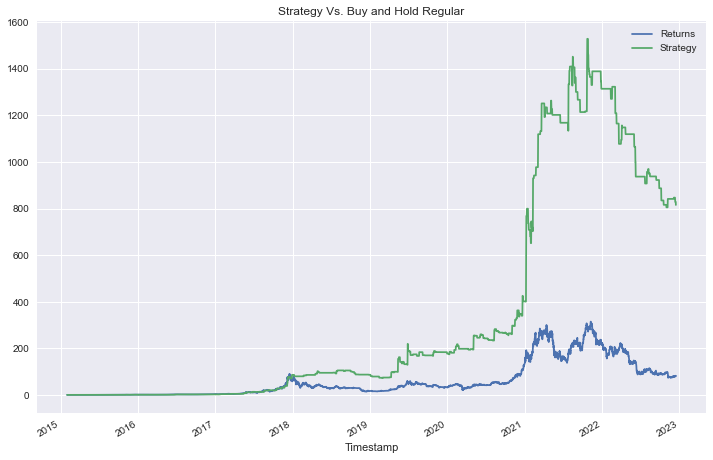

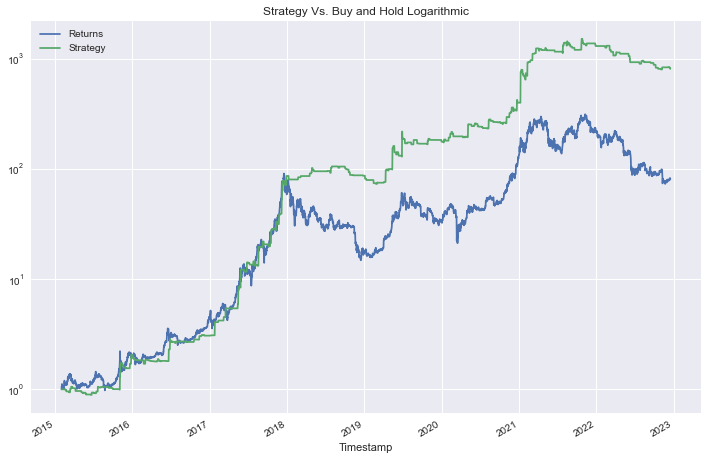

In [16]:
optimizer.plot_all()

In [17]:
optimizer.results_overview

,index,SMA_Trend,EMA_Trend,performance,drawdown
0,10,5,55,6629.395644,0.475825
1,11,5,60,4590.218151,0.397121
2,12,5,65,4866.626082,0.353146
3,13,5,70,4375.008595,0.357595
4,14,5,75,4779.310339,0.366582
...,...,...,...,...,...
2853,3595,300,280,62.224955,0.406772
2854,3596,300,285,76.125141,0.396474
2855,3597,300,290,76.523210,0.395110
2856,3598,300,295,76.523210,0.395110


In [18]:
pd.set_option('display.max_rows', None)

In [19]:
optimizer.results_overview.sort_values(by=["performance"], axis=0, ascending = False)

,index,SMA_Trend,EMA_Trend,performance,drawdown
40,70,10,55,81968.971356,0.472972
39,69,10,50,80483.994714,0.474542
70,106,10,235,79149.704524,0.333579
71,107,10,240,78287.753807,0.333579
72,108,10,245,77436.475071,0.333579
79,115,10,280,76658.771948,0.279425
42,72,10,65,72762.831764,0.377390
69,105,10,230,72429.886062,0.350787
41,71,10,60,72413.686849,0.411874
73,109,10,250,72138.849032,0.307730
